In [98]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import seaborn as sns # visualization
import matplotlib.pyplot as plt # plotting
from scipy import stats # statistical functions

# sklearn modules for various preprocessing, modeling, and evaluation tasks
from sklearn import preprocessing, utils
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For advanced statistical diagnostics
import statsmodels.api as sm


In [109]:
# Loading Orginal dataset  
# df_in = pd.read_csv("/Users/prasanna/Documents/College/MasterThesis/Dataset/Medical/insuranceTesting.csv")
df = pd.read_csv("/Users/prasanna/Python/HealthInsuranceAugmentatedDataset.csv")

In [110]:
# Orginal dataset info() and head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100338 entries, 0 to 100337
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   age       100338 non-null  int64
 1   sex       100338 non-null  int64
 2   bmi       100338 non-null  int64
 3   children  100338 non-null  int64
 4   smoker    100338 non-null  int64
 5   region    100338 non-null  int64
 6   charges   100338 non-null  int64
dtypes: int64(7)
memory usage: 5.4 MB


In [ ]:
# Initial Data Visualization
plt.figure(figsize=(18, 16))

# Assigning light colors for categorical variables
light_colors = [(0.53, 0.81, 0.98),  # Light blue
                (0.74, 0.88, 0.78)]  # Light green

# Distribution of Age
plt.subplot(4,2,1)
plt.title('Distribution of Age')
sns.histplot(x='age', data=df_in, color=light_colors[0])

# Distribution of Sex
plt.subplot(4,2,2)
plt.title('Distribution of Sex')
sns.histplot(x='sex', data=df_in, color=light_colors[1])

# Distribution of BMI (Body Mass Index)
plt.subplot(4,2,3)
plt.title('Distribution of BMI (Body Mass Index)')
sns.histplot(df_in['bmi'], color=light_colors[0])

# Distribution of Children
plt.subplot(4,2,4)
plt.title('Distribution of Children')
sns.histplot(df_in['children'], color=light_colors[1])

# Distribution of Smoker
plt.subplot(4,2,5)
plt.title('Distribution of Smoker')
sns.histplot(x='smoker', data=df_in, color=light_colors[0])

# Distribution of Region
plt.subplot(4,2,6)
plt.title('Distribution of Region')
sns.histplot(df_in['region'], color=light_colors[1])

# Distribution of Charges
plt.subplot(4,2,7)
plt.title('Distribution of Charges')
sns.histplot(df_in['charges'], color=light_colors[0])

plt.tight_layout()
plt.show()


In [44]:
# Label Encoding on original Dataset 
label_encoder = LabelEncoder()
df_in['sex_encoded'] = label_encoder.fit_transform(df_in['sex'])
df_in['smoker_encoded'] = label_encoder.fit_transform(df_in['smoker'])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
region_encoded = onehot_encoder.fit_transform(df_in[['region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=onehot_encoder.categories_[0])
region_encoded_df = region_encoded_df.round(2)  # Round off values
df_in = pd.concat([df_in, region_encoded_df], axis=1)

# Dropping Original Columns
df_in.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

print(df_in)


      age   bmi  children   charges  sex_encoded  smoker_encoded  northeast  \
0      19 27.90         0 16,884.92            0               1          0   
1      18 33.77         1  1,725.55            1               0          0   
2      28 33.00         3  4,449.46            1               0          0   
3      33 22.70         0 21,984.47            1               0          0   
4      32 28.88         0  3,866.86            1               0          0   
...   ...   ...       ...       ...          ...             ...        ...   
1333   50 30.97         3 10,600.55            1               0          0   
1334   18 31.92         0  2,205.98            0               0          1   
1335   18 36.85         0  1,629.83            0               0          0   
1336   21 25.80         0  2,007.94            0               0          0   
1337   61 29.07         0 29,141.36            0               1          0   

      northwest  southeast  southwest  
0          

/usr/local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
# Encoded Data head() and info()
df_in.head()
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   bmi             1338 non-null   float64
 2   children        1338 non-null   int64  
 3   charges         1338 non-null   float64
 4   sex_encoded     1338 non-null   int64  
 5   smoker_encoded  1338 non-null   int64  
 6   northeast       1338 non-null   int64  
 7   northwest       1338 non-null   int64  
 8   southeast       1338 non-null   int64  
 9   southwest       1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


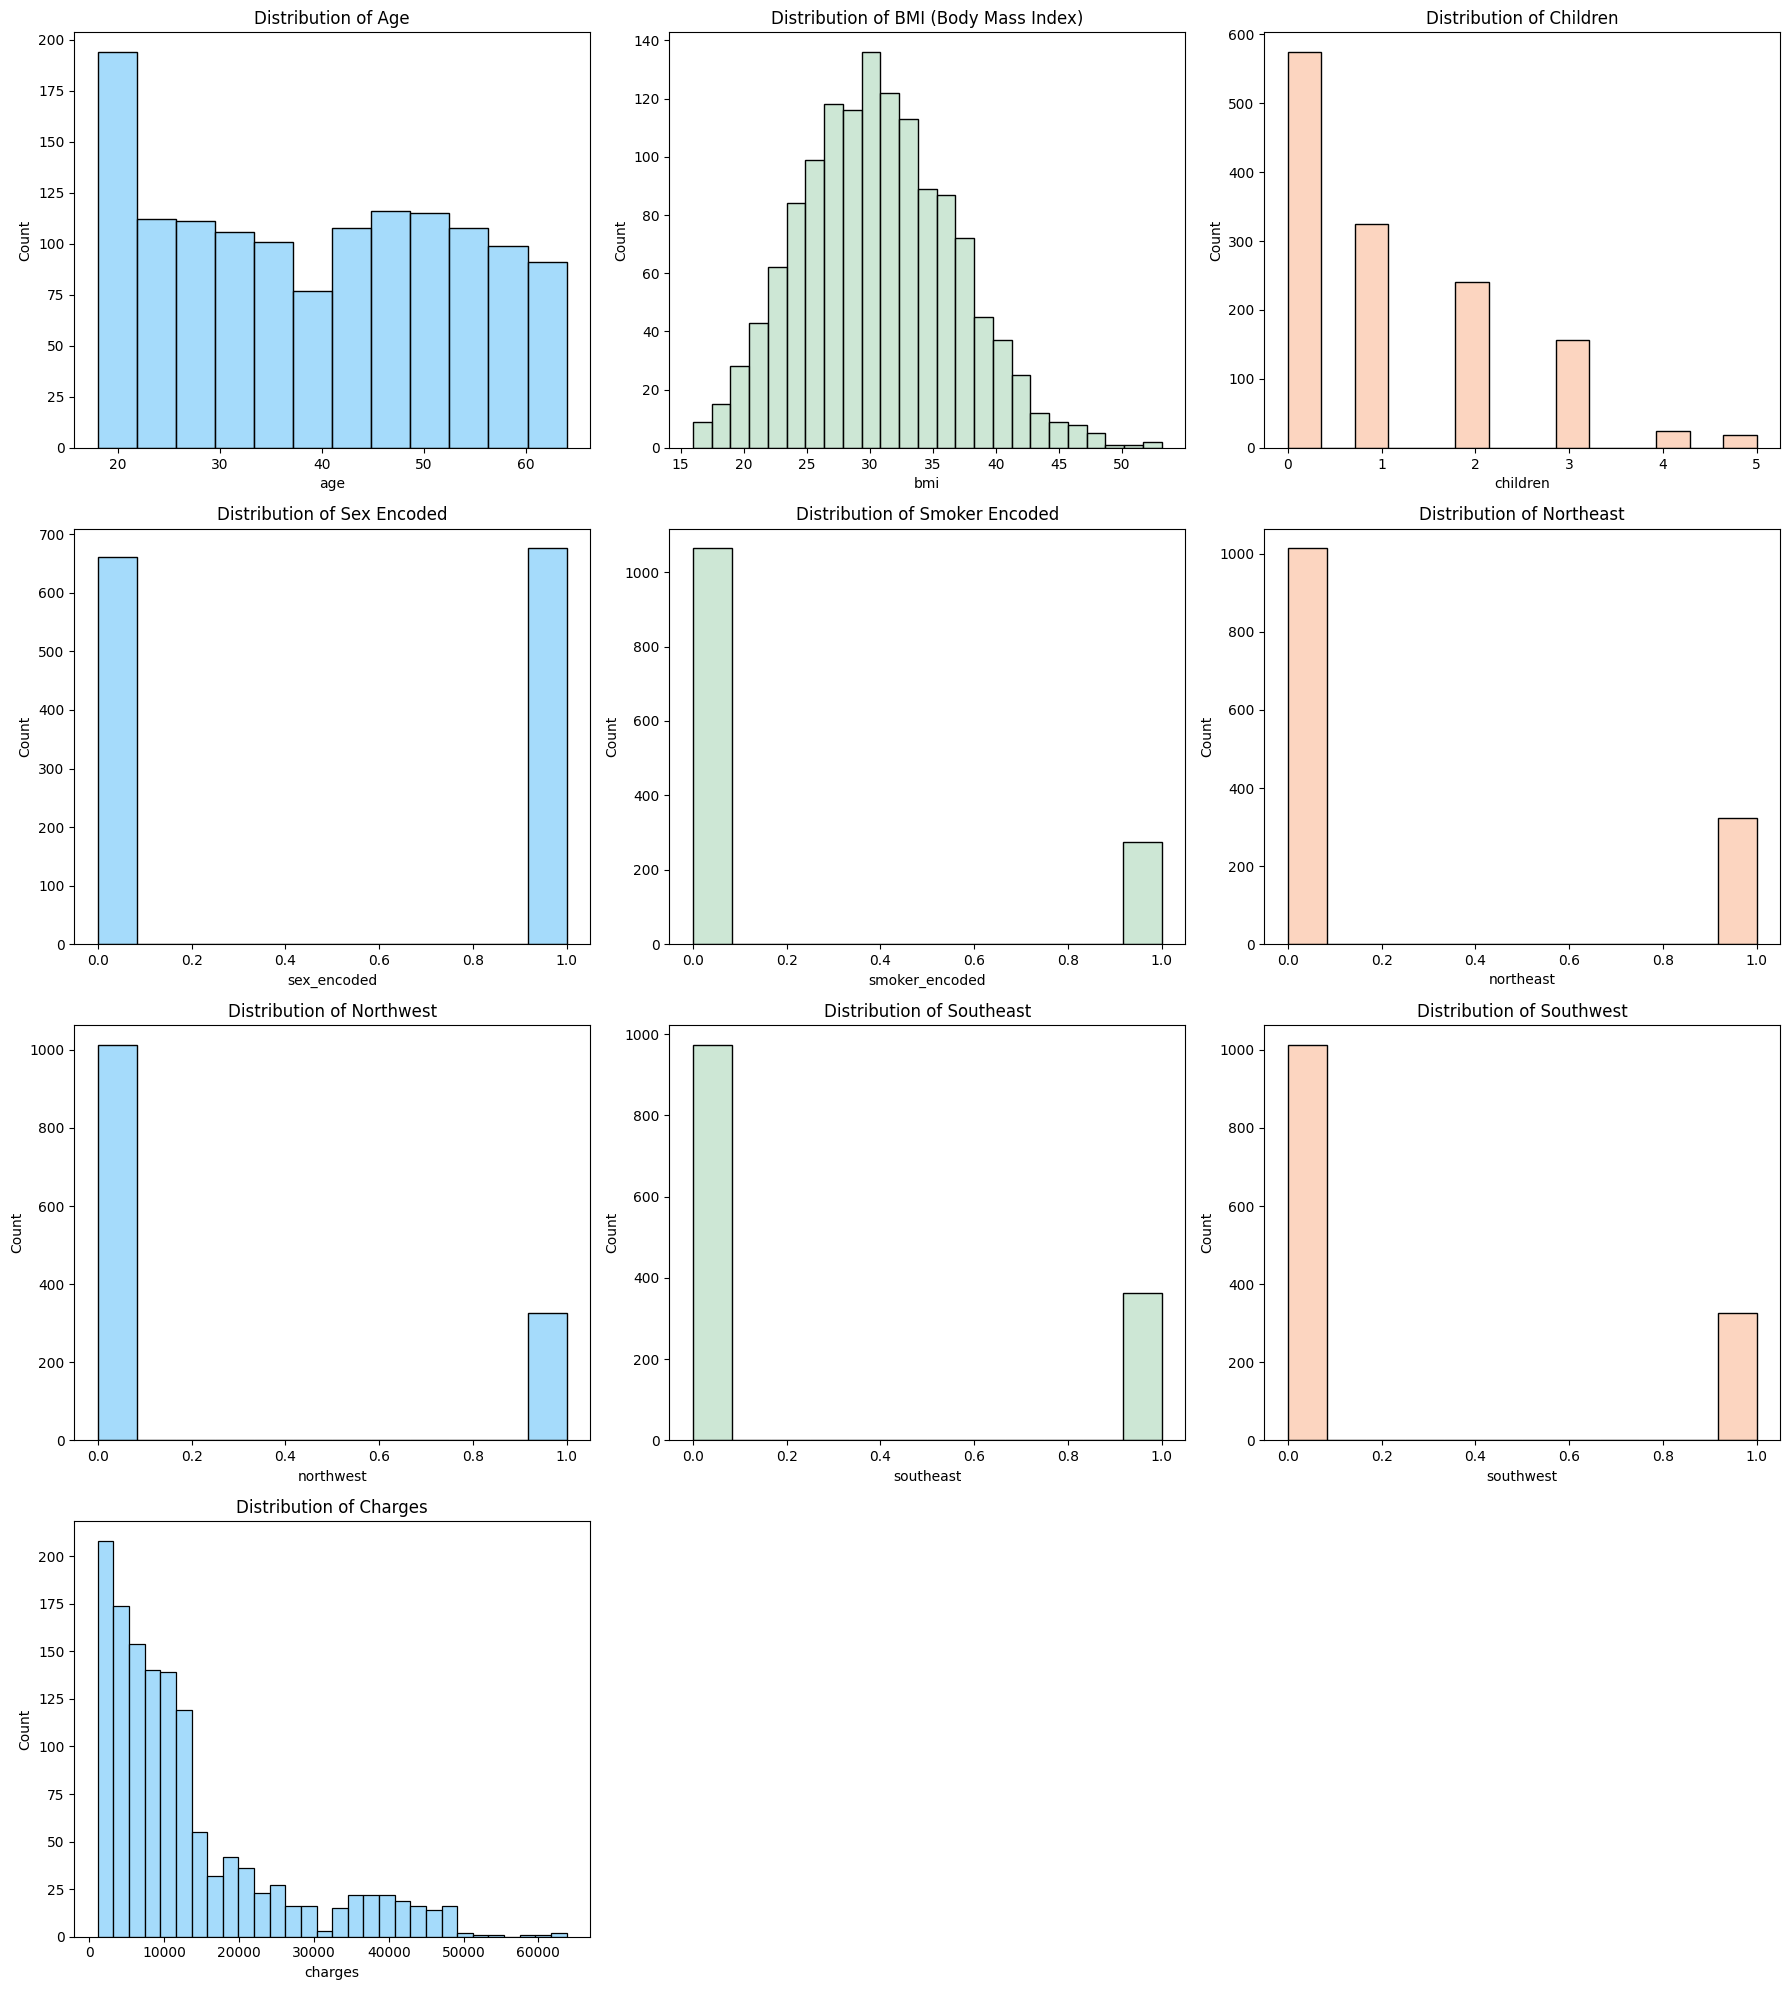

In [46]:
#Encoded Data Visualization 
plt.figure(figsize=(18, 20))

# Assigning light colors for categorical variables
light_colors = [(0.53, 0.81, 0.98),  # Light blue
                (0.74, 0.88, 0.78),  # Light green
                (0.99, 0.78, 0.67)]  # Light orange

# Distribution of Age
plt.subplot(4, 3, 1)
plt.title('Distribution of Age')
sns.histplot(df_in['age'], color=light_colors[0])  # Light blue color

# Distribution of BMI (Body Mass Index)
plt.subplot(4, 3, 2)
plt.title('Distribution of BMI (Body Mass Index)')
sns.histplot(df_in['bmi'], color=light_colors[1])  # Light green color

# Distribution of Children
plt.subplot(4, 3, 3)
plt.title('Distribution of Children')
sns.histplot(df_in['children'], color=light_colors[2])  # Light orange color

# Distribution of Sex Encoded
plt.subplot(4, 3, 4)
plt.title('Distribution of Sex Encoded')
sns.histplot(df_in['sex_encoded'], color=light_colors[0])  # Light green color

# Distribution of Smoker Encoded
plt.subplot(4, 3, 5)
plt.title('Distribution of Smoker Encoded')
sns.histplot(df_in['smoker_encoded'], color=light_colors[1])  # Light orange color

# Distribution of Northeast
plt.subplot(4, 3, 6)
plt.title('Distribution of Northeast')
sns.histplot(df_in['northeast'], color=light_colors[2])  # Light blue color

# Distribution of Northwest
plt.subplot(4, 3, 7)
plt.title('Distribution of Northwest')
sns.histplot(df_in['northwest'], color=light_colors[0])  # Light green color

# Distribution of Southeast
plt.subplot(4, 3, 8)
plt.title('Distribution of Southeast')
sns.histplot(df_in['southeast'], color=light_colors[1])  # Light orange color

# Distribution of Southwest
plt.subplot(4, 3, 9)
plt.title('Distribution of Southwest')
sns.histplot(df_in['southwest'], color=light_colors[2])  # Light blue color

# Distribution of Charges
plt.subplot(4, 3, 10)
plt.title('Distribution of Charges')
sns.histplot(df_in['charges'], color=light_colors[0])  # Light blue color

plt.tight_layout()
plt.show()


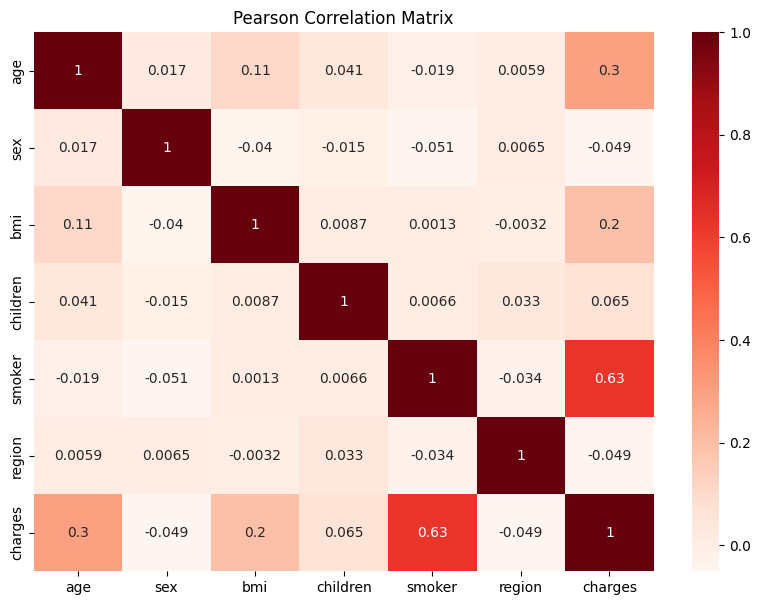

In [112]:
#Encoded correlation Matrix 
charges_col = df_in.pop('charges')
df_in['charges'] = charges_col
# Pearson Correlation Matrix
plt.figure(figsize=(10, 7))
pearson_corr = df_in.corr(method='pearson')
sns.heatmap(pearson_corr, cmap='Reds', annot=True)
plt.title('Pearson Correlation Matrix')
plt.show()

In [48]:
#DATAGENERATION : KDE works on numerical value hence it expects string/catego var as been encoded

# ## X contain all the independent variable  
# X = df_in[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'northeast','northwest','southeast','southwest']]

# # y contains 'charges' which is target variable and its continues 
# y = df_in['charges'].values.reshape(-1, 1)

# # Fit KDE on the original data
# kde = KernelDensity(kernel='gaussian', bandwidth=0.3) 
# kde.fit(X)

# kde_target = KernelDensity(kernel='gaussian', bandwidth=0.3)
# kde_target.fit(y)

# # Generate synthetic samples using random sampling from the KDE
# num_synthetic_samples = 99000  # Adjust as needed based on number of records to be generated 
# synthetic_samples = kde.sample(num_synthetic_samples, random_state=42)

# synthetic_samples_target = kde_target.sample(num_synthetic_samples, random_state=42)

# # Combine the synthetic samples for features and target variable
# synthetic_samples_combined = np.column_stack((synthetic_samples, synthetic_samples_target))

# # Create a DataFrame for synthetic records
# df_synthetic = pd.DataFrame(data=synthetic_samples_combined, columns=X.columns.tolist() + ['charges'])

# # Add the synthetic records to the original data
# df_combined = pd.concat([df_in,df_synthetic], ignore_index=True)

# # df_combined = df_combined.round(0).astype(int)
# df_combined.iloc[:, ~df_combined.columns.isin(['bmi', 'charges'])] = df_combined.iloc[:, ~df_combined.columns.isin(['bmi', 'charges'])].round(0)

# df_combined['age'] = df_combined['age'].round().abs().clip(17, 65).astype(int)
# df_combined['sex_encoded'] = df_combined['sex_encoded'].round().abs().clip(0, 1).astype(int)
# df_combined['smoker_encoded'] = df_combined['smoker_encoded'].round().abs().clip(0, 1).astype(int)
# df_combined['children'] = df_combined['children'].round().abs().clip(0, 5).astype(int)
# df_combined['northeast'] = df_combined['northeast'].round().abs().clip(0,1).astype(int)
# df_combined['northwest'] = df_combined['northwest'].round().abs().clip(0,1).astype(int)
# df_combined['southeast'] = df_combined['southeast'].round().abs().clip(0,1).astype(int)
# df_combined['southwest'] = df_combined['southwest'].round().abs().clip(0,1).astype(int)
# # Save the combined dataset to a new CSV file
# df_combined.to_csv('/Users/prasanna/HealthInsurancePostAugmentation.csv', index=False)

# print(df_combined)
# print(df_combined.info())

In [159]:
# # Loading Augmented Dataset 
# # df = pd.read_csv("/Users/prasanna/Python/MasterThesis-/Python/HealthInsurancePostAugmentation.csv") 
df = pd.read_csv("/Users/prasanna/HealthInsurancePostAugmentation.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100338 entries, 0 to 100337
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             100338 non-null  int64  
 1   bmi             100338 non-null  float64
 2   children        100338 non-null  int64  
 3   sex_encoded     100338 non-null  int64  
 4   smoker_encoded  100338 non-null  int64  
 5   northeast       100338 non-null  int64  
 6   northwest       100338 non-null  int64  
 7   southeast       100338 non-null  int64  
 8   southwest       100338 non-null  int64  
 9   charges         100338 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 7.7 MB


In [160]:
# Apply log transformation on Charge to adjust the rigth skewness  
median_bmi = df['bmi'].median()
bmi_upper_bound = df['bmi'].quantile(0.95)
df.loc[df['bmi'] > bmi_upper_bound, 'bmi'] = median_bmi
df['charges'] = np.log(df['charges']) 
# from scipy.stats import boxcox

# #Box and exp 
# # df['charges'] = np.log1p(df['charges'])
# # df['charges'] = np.cbrt(df['charges'])
# from sklearn.preprocessing import QuantileTransformer

# # Step 1: Apply Quantile Transformation
# qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
# df['charges'] = qt.fit_transform(df[['charges']])

# # Step 2: Normalize the transformed data to 0 - 1
# df['charges'] = (df['charges'] - df['charges'].min()) / (df['charges'].max() - df['charges'].min())

# # Step 3: Scale to the range 10 to 40
# df['charges'] = 10 + 30 * df['charges']  # 30 is the range size (40 - 10), and 10 is the new minimum



In [161]:
#Summary of the data 
pd.options.display.float_format = '{:,.2f}'.format
# Assuming df is your DataFrame with over 1L record
df.describe()

,age,bmi,children,sex_encoded,smoker_encoded,northeast,northwest,southeast,southwest,charges
count,"100,338.00","100,338.00","100,338.00","100,338.00","100,338.00","100,338.00","100,338.00","100,338.00","100,338.00","100,338.00"
mean,39.25,29.99,1.14,0.53,0.27,0.30,0.30,0.33,0.30,9.10
std,14.01,5.23,1.20,0.50,0.44,0.46,0.46,0.47,0.46,0.92
min,17.00,15.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.02
25%,27.00,26.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.47
50%,39.00,30.37,1.00,1.00,0.00,0.00,0.00,0.00,0.00,9.14
75%,51.00,33.71,2.00,1.00,1.00,1.00,1.00,1.00,1.00,9.72
max,65.00,41.08,5.00,1.00,1.00,1.00,1.00,1.00,1.00,11.06


In [162]:
# Unique values Of Augmented dataset
unique_values = df.nunique()

# Display the unique values
print("Unique Values in the 'column_name' column:")
print(unique_values)

summary = df.describe()

print(summary)

Unique Values in the 'column_name' column:
age                   49
bmi                94550
children               6
sex_encoded            2
smoker_encoded         2
northeast              2
northwest              2
southeast              2
southwest              2
charges           100337
dtype: int64
             age        bmi   children  sex_encoded  smoker_encoded  \
count 100,338.00 100,338.00 100,338.00   100,338.00      100,338.00   
mean       39.25      29.99       1.14         0.53            0.27   
std        14.01       5.23       1.20         0.50            0.44   
min        17.00      15.26       0.00         0.00            0.00   
25%        27.00      26.29       0.00         0.00            0.00   
50%        39.00      30.37       1.00         1.00            0.00   
75%        51.00      33.71       2.00         1.00            1.00   
max        65.00      41.08       5.00         1.00            1.00   

       northeast  northwest  southeast  southwest    c

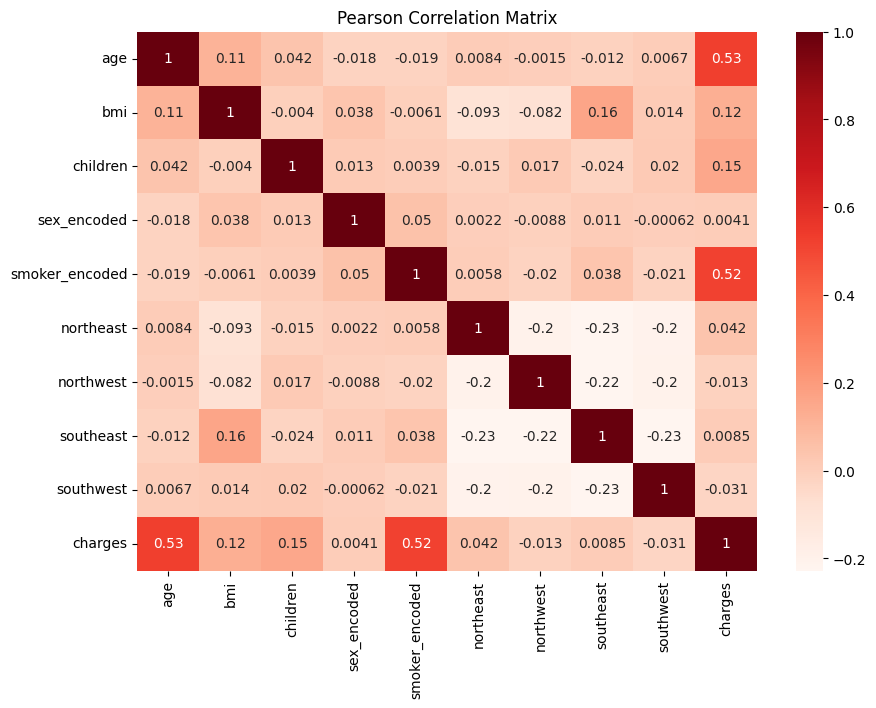

In [163]:
#correlation Matric on Augmented Dataset 
# Pearson Correlation Matrix
plt.figure(figsize=(10, 7))
pearson_corr = df.corr(method='pearson')
sns.heatmap(pearson_corr, cmap='Reds', annot=True)
plt.title('Pearson Correlation Matrix')
plt.show()

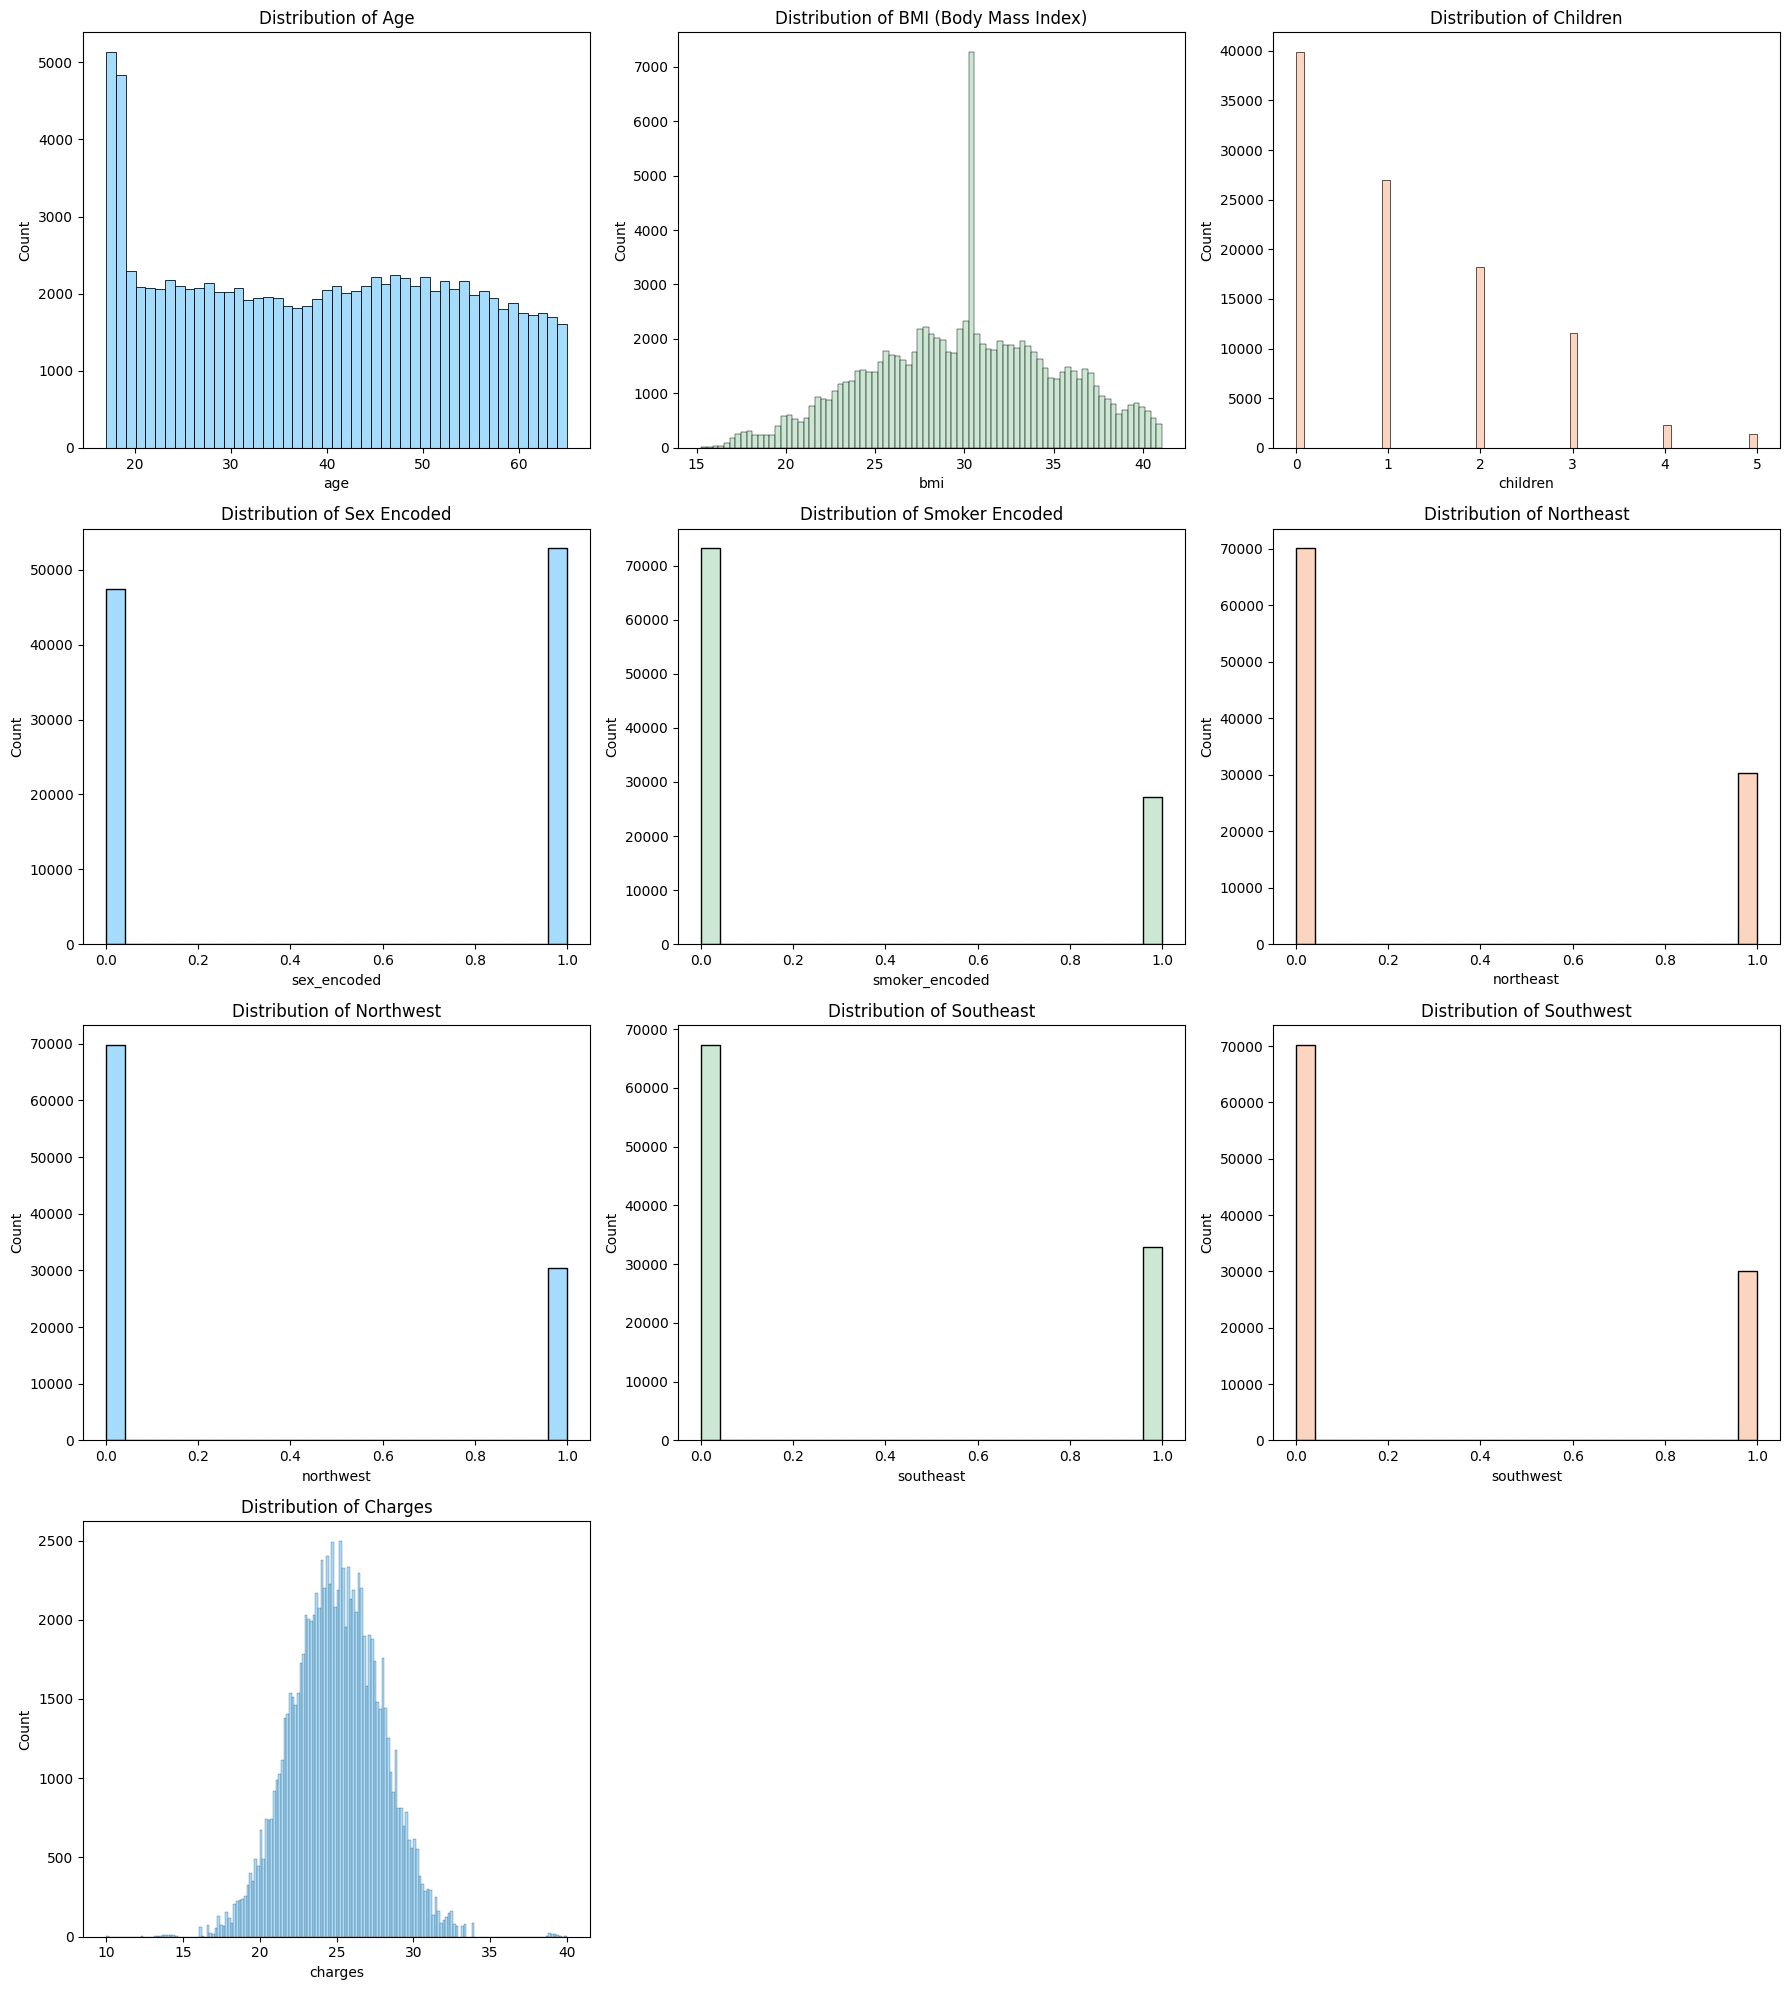

In [89]:
#Data Vsualization on Augmented Dataset 
plt.figure(figsize=(18, 20))

# Assigning light colors for categorical variables
light_colors = [(0.53, 0.81, 0.98),  # Light blue
                (0.74, 0.88, 0.78),  # Light green
                (0.99, 0.78, 0.67)]  # Light orange

# Distribution of Age
plt.subplot(4, 3, 1)
plt.title('Distribution of Age')
sns.histplot(df['age'], color=light_colors[0])  # Light blue color

# Distribution of BMI (Body Mass Index)
plt.subplot(4, 3, 2)
plt.title('Distribution of BMI (Body Mass Index)')
sns.histplot(df['bmi'], color=light_colors[1])  # Light green color

# Distribution of Children
plt.subplot(4, 3, 3)
plt.title('Distribution of Children')
sns.histplot(df['children'], color=light_colors[2])  # Light orange color

# Distribution of Sex Encoded
plt.subplot(4, 3, 4)
plt.title('Distribution of Sex Encoded')
sns.histplot(df['sex_encoded'], color=light_colors[0])  # Light green color

# Distribution of Smoker Encoded
plt.subplot(4, 3, 5)
plt.title('Distribution of Smoker Encoded')
sns.histplot(df['smoker_encoded'], color=light_colors[1])  # Light orange color

# Distribution of Northeast
plt.subplot(4, 3, 6)
plt.title('Distribution of Northeast')
sns.histplot(df['northeast'], color=light_colors[2])  # Light blue color

# Distribution of Northwest
plt.subplot(4, 3, 7)
plt.title('Distribution of Northwest')
sns.histplot(df['northwest'], color=light_colors[0])  # Light green color

# Distribution of Southeast
plt.subplot(4, 3, 8)
plt.title('Distribution of Southeast')
sns.histplot(df['southeast'], color=light_colors[1])  # Light orange color

# Distribution of Southwest
plt.subplot(4, 3, 9)
plt.title('Distribution of Southwest')
sns.histplot(df['southwest'], color=light_colors[2])  # Light blue color


# Distribution of Charges
plt.subplot(4, 3, 10)
plt.title('Distribution of Charges')
sns.histplot(df['charges'], color=light_colors[0])  # Light blue color

plt.tight_layout()
plt.show()


<Figure size 600x400 with 0 Axes>

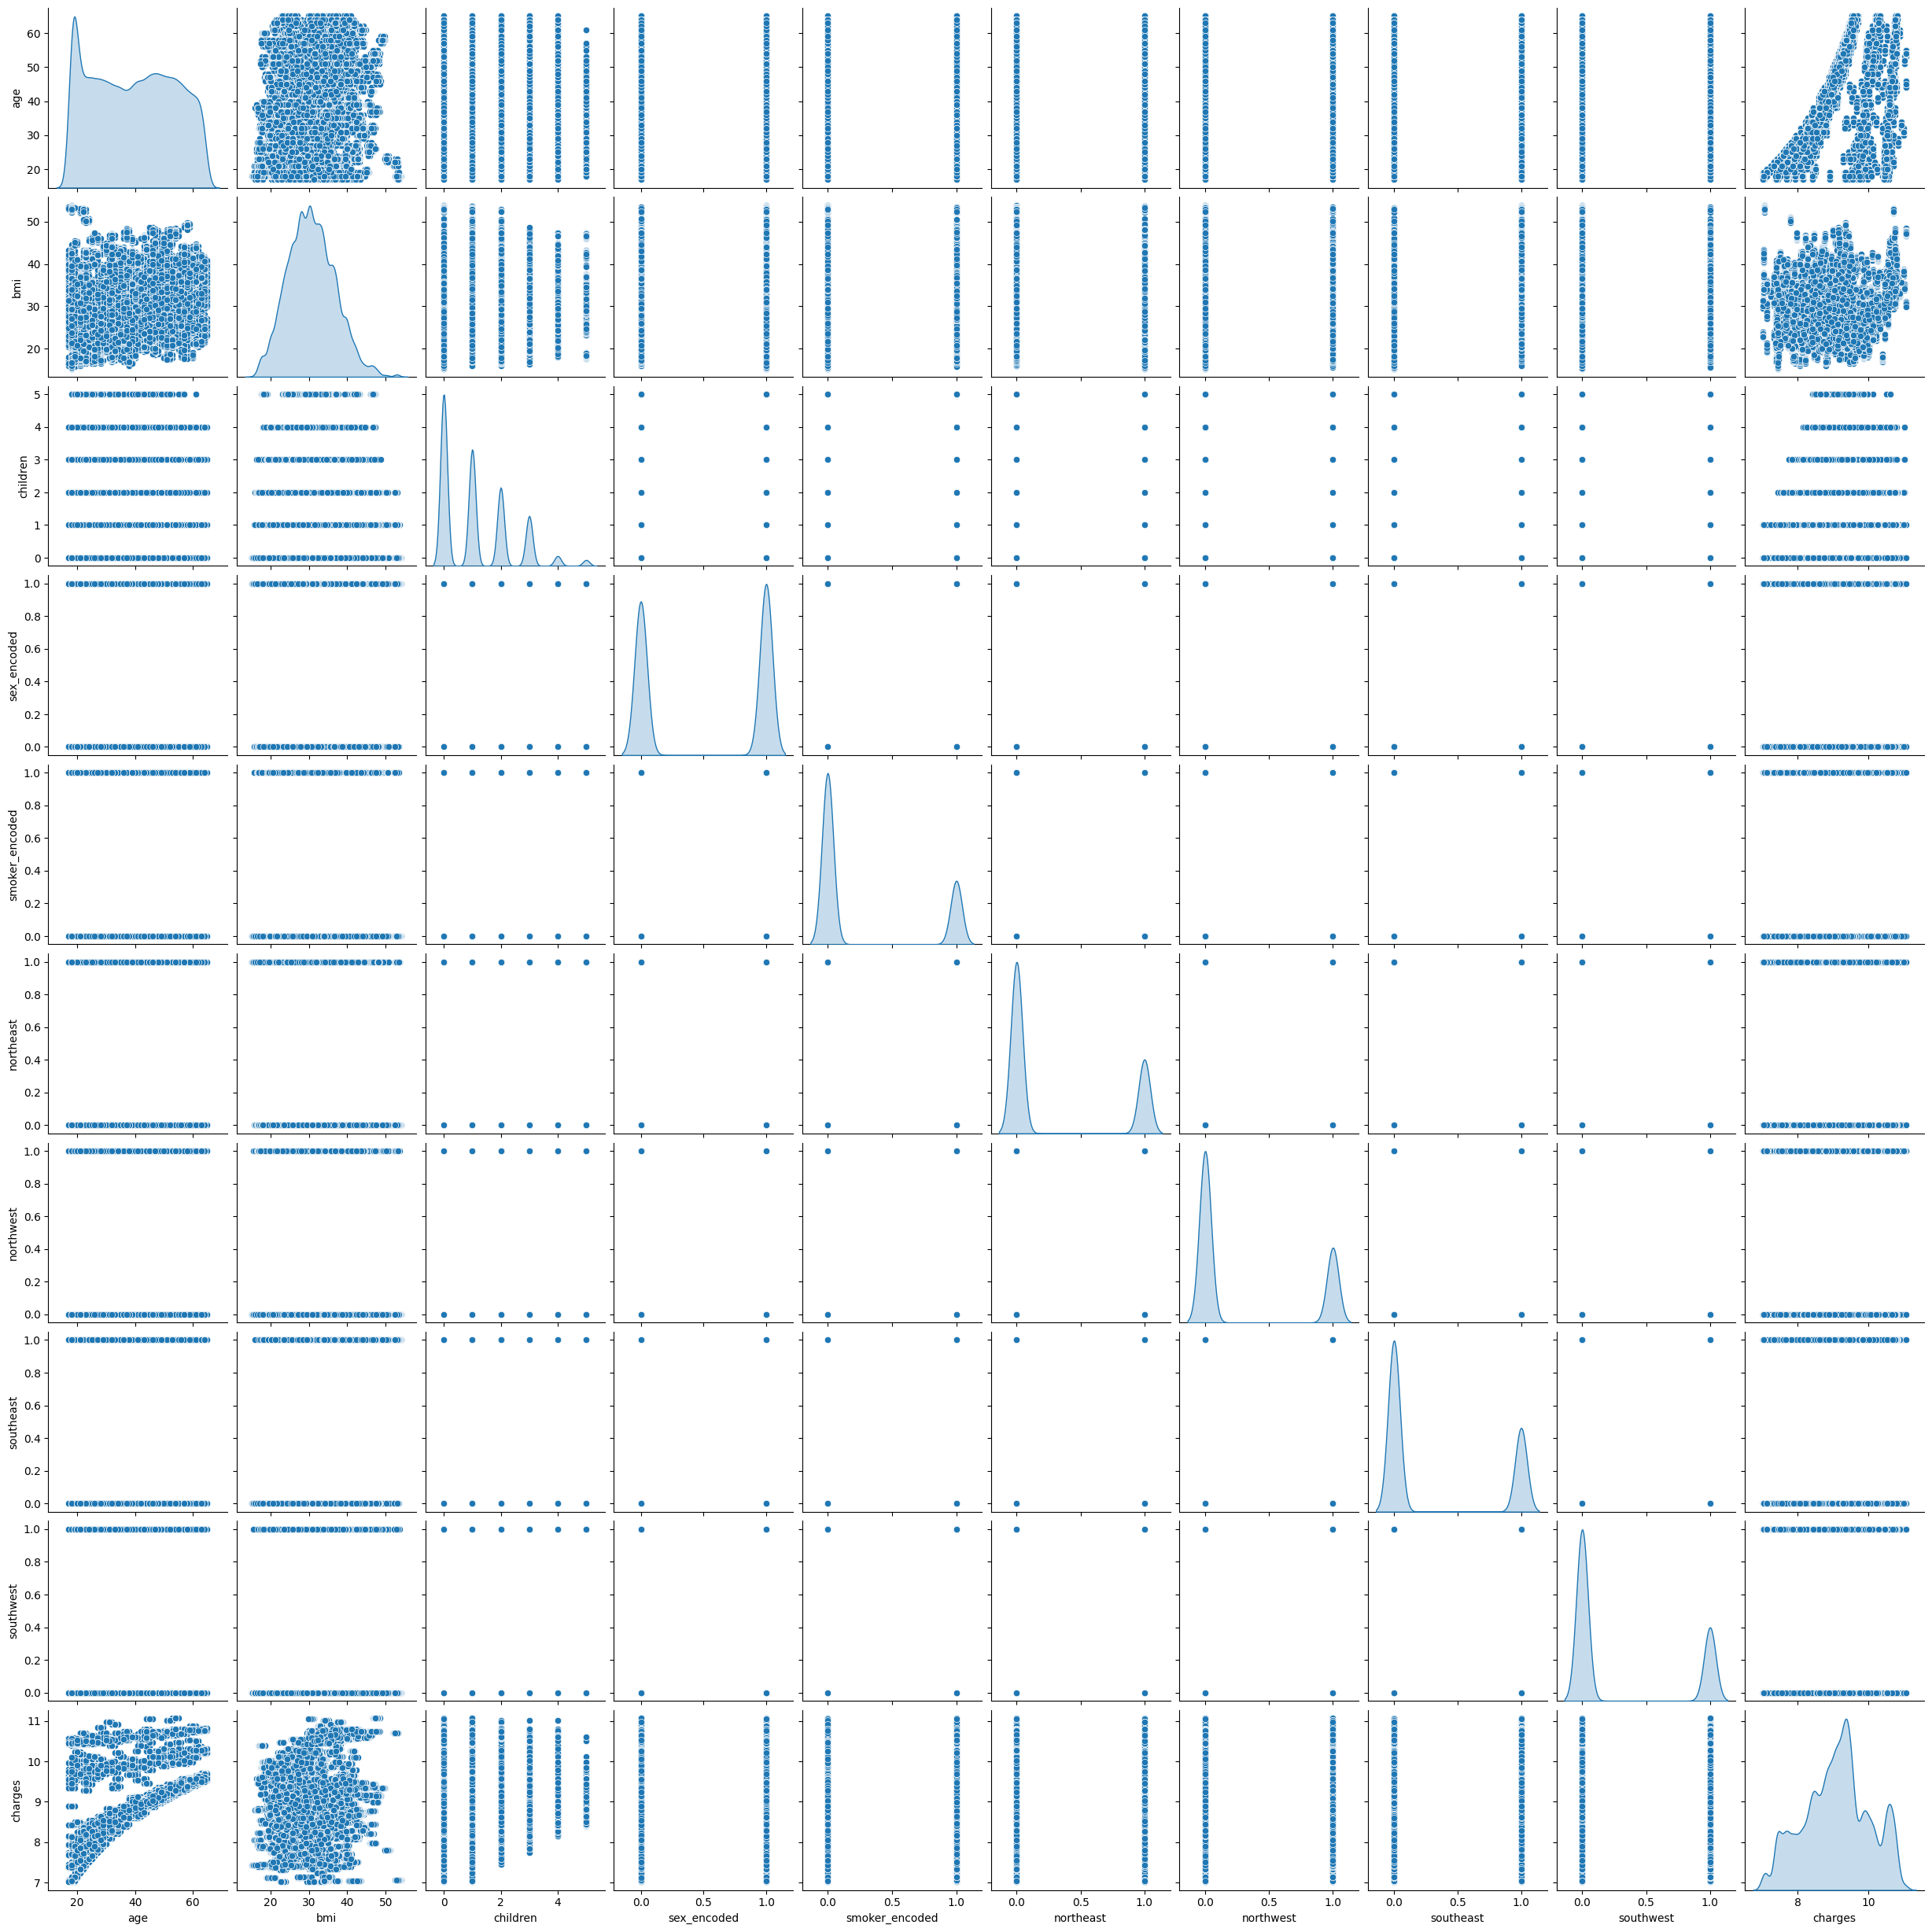

In [56]:
# Pair plot
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [57]:
# Doc purpose default model 
models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": svm.SVR(),
    "MLP": MLPRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R^2: {r2_score(y_test, y_pred)}\n")

RandomForest Performance:
MAE: 0.11717543388588413
MSE: 0.10523125575033687
RMSE: 0.3243936740294682
R^2: 0.8737187781900407

GradientBoosting Performance:
MAE: 0.33646327305762375
MSE: 0.2866959506781965
RMSE: 0.5354399599191272
R^2: 0.6559547381482751

XGBoost Performance:
MAE: 0.20983532928206378
MSE: 0.13845966080106997
RMSE: 0.3721016807286282
R^2: 0.8338435190887127



In [ ]:
# Doc purpose Tuned model 
tuned_models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": svm.SVR(),
    "MLP": MLPRegressor()
}

param_grids = {
    "RandomForest": {"n_estimators": [100,200,500], "max_depth": [None, 10, 20], "max_features": ['None','auto', 'sqrt'],
                                "min_samples_split": [2,3,5],"min_samples_leaf": [1,3,4],"bootstrap":[True,False]},
     "GradientBoosting": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100,300, 500], "max_depth": [3, 6, 10], 
                                "min_samples_split": [2,3,4],"min_samples_leaf": [1,2,4],"loss": ['squared_error', 'absolute_error', 'huber']},
    "XGBoost": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100,300,500], "max_depth": [7,10,20],"gamma": [0,0.01,0.1], "min_child_weight":[1,3,5],
                                "reg_alpha":[0, 0.1, 1], "reg_lamba":[1,5,10]},
    "SVR": {"C": [1, 10, 30], "kernel": ["linear", "rbf","poly"], "gamma":['auto','scale',0.01]},
    "MLP": {"hidden_layer_sizes": [(50, 50),(100,100),(200,200)], "learning_rate": ['constant','adaptive'], "alpha": [0.001,0.01,0.1], "max_iter": [200,500,100] }
}

for name, model in tuned_models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)
    print(f"{name} (Tuned) Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R^2: {r2_score(y_test, y_pred)}\n")

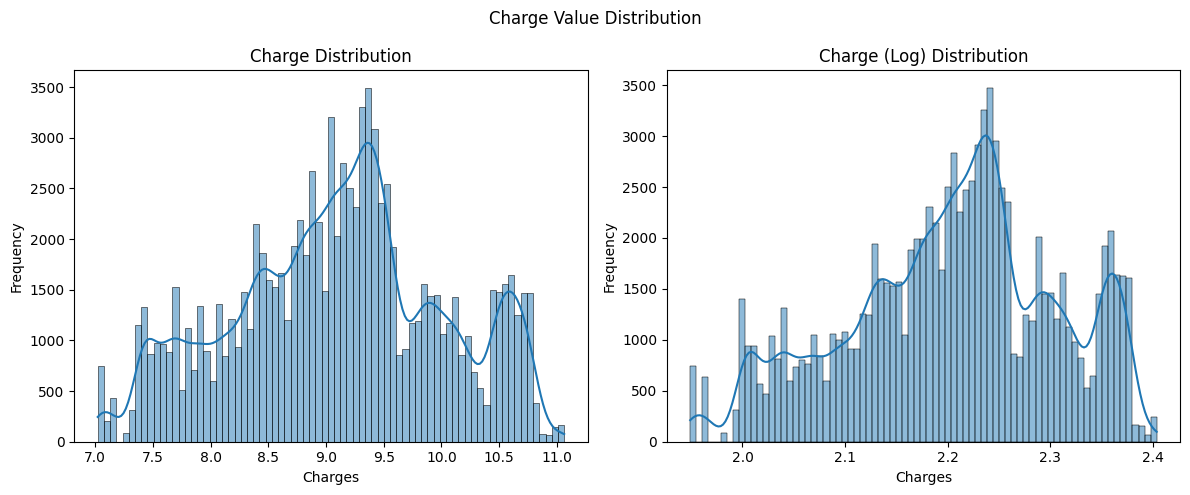

In [109]:
# Doc purpose Charge transaction image 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Charge Value Distribution')

# First subplot - distribution of charges before log transformation
sns.histplot(df['charges'], kde=True, ax=axes[0])
axes[0].set_title('Charge Distribution')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

# Apply log transformation
df['log_charges'] = np.log(df['charges'])

# Second subplot - distribution of charges after log transformation
sns.histplot(df['log_charges'], kde=True, ax=axes[1])
axes[1].set_title('Charge (Log) Distribution')
axes[1].set_xlabel('Charges')
axes[1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
# Statistical test using the Shapiro-Wilk Test
shapiro_test = stats.shapiro(df)
print(f"Shapiro-Wilk Test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# If the p-value is less than 0.05, the data is not normally distributed
if shapiro_test[1] < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data is normally distributed.")

In [158]:
# X and y values defined and a Data Split 
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [164]:
# X and Y values after removing features which doesnt make much of impact
# features_to_remove = ['sex_encoded', 'northeast', 'northwest', 'southeast', 'southwest']
features_to_remove = ['southeast']
X_reduced = df.drop(features_to_remove + ['charges'], axis=1) 
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)


In [165]:
# Standardscaler for standardizing a dataset 
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

default_result = []
result = [] # To append the Rsqr_score in result and draw a conclusion graph later 


In [166]:
# Random forest : Default 
forest_reg_model = RandomForestRegressor()
forest_reg_model.fit(X_train, y_train);
default_rf_y_pred = forest_reg_model.predict(X_test)

MAE_forest_reg= mean_absolute_error(y_test, default_rf_y_pred)
MSE_forest_reg = mean_squared_error(y_test, default_rf_y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)

score_Rforest = r2_score(y_test, default_rf_y_pred)
default_result.append(score_Rforest)

print("Deafult Metrics of Random forest Regression")

default_rf_scores = cross_val_score(forest_reg_model, X_train, y_train, cv=5)
print(" Deafult Random Forest Cross val score :", default_rf_scores)

df_Dtree = pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg, score_Rforest], index=['MAE', 'MSE', 'RMSE', 'R2_score_Rforest'], columns=['Metrics'])
display(df_Dtree)

df_Dtree = pd.DataFrame({'Actual': y_test, 'Predicted': default_rf_y_pred})
display(df_Dtree.head())



Deafult Metrics of Random forest Regression
 Deafult Random Forest Cross val score : [0.87162052 0.86594859 0.88164355 0.87411134 0.86115243]


,Metrics
MAE,0.12
MSE,0.12
RMSE,0.34
R2_score_Rforest,0.86


,Actual,Predicted
5219,9.18,9.18
78998,7.46,7.46
65103,9.75,8.45
97160,9.69,9.68
92164,9.69,9.60


In [123]:
default_rf_scores = cross_val_score(forest_reg_model, X_train, y_train, cv=5)
print(" Deafult Random Forest Cross val score :", default_rf_scores)

 Deafult Random Forest Cross val score : [0.8854686  0.87681577 0.88606691 0.87197512 0.8845705 ]


In [61]:
#Random FeatureImpratance 
forest_reg_model = RandomForestRegressor()
forest_reg_model.fit(X_train, y_train);
importances = forest_reg_model.feature_importances_
print("Important feature:",importances)

Important feature: [0.4090919  0.19266115 0.05226336 0.0182102  0.27215257 0.0141595
 0.01388047 0.0141071  0.01347376]


In [ ]:
# Noamlity distribution

# Your existing data for metrics from cross-validation
mae_vals_default = [0.32973256155456543, 0.3359545813130817, 0.3283438694816208, 0.33635561067746517, 0.3357320536022487]
mse_vals_default = [0.26893224637330604, 0.28191146236839515, 0.2706169953042618, 0.28286814524990245, 0.2821545131526038]
mse_vals_default_log = np.log(mse_vals_default)
rmse_vals_default = [0.518586778054846, 0.5309533523468848, 0.5202086074876711, 0.5318534998003702, 0.5311821845210961]
rmse_vals_default_log = np.log(rmse_vals_default)
r2_vals_default = [0.6784183190489415, 0.6675333140041244, 0.6797193818273797, 0.6613213254017083, 0.6671326065886919]

mae_vals_tuned = [0.17204033032807786, 0.17890230239992722, 0.17716861831976455, 0.17745534317074801, 0.18060217322406938]
mse_vals_tuned = [0.11174038195118108, 0.11805714474172646, 0.11357712432477436, 0.11569788923222854, 0.12375249677418959]
rmse_vals_tuned = [0.334275906925972, 0.3435944480659233, 0.3370120536787584, 0.3401439242912161, 0.35178473072916283]
r2_vals_tuned = [0.8663839671792484, 0.8607716502881101, 0.8655792052228347, 0.8614746536964305, 0.8540049189038263]

# Function to perform Shapiro-Wilk test and print results
def check_normality(test_data, metric_name):
    stat, p_value = stats.shapiro(test_data)
    print(f'Normality test for {metric_name}: Statistics={stat:.3f}, p-value={p_value:.3f}')
    # Interpretation based on p-value
    if p_value > 0.05:
        print(f"The data for {metric_name} appears to be normally distributed.\n")
    else:
        print(f"The data for {metric_name} does not appear to be normally distributed.\n")

# Perform Shapiro-Wilk test on the metrics
print("Testing normality for Default Gradient Boosting:")
check_normality(mae_vals_default, "MAE Default")
check_normality(mse_vals_default_log, "MSE Default")
check_normality(rmse_vals_default_log, "RMSE Default")
check_normality(r2_vals_default, "R-squared Default")

print("Testing normality for Tuned Gradient Boosting:")
check_normality(mae_vals_default, "MAE Tuned")
check_normality(mse_vals_tuned, "MSE Tuned")
check_normality(rmse_vals_tuned, "RMSE Tuned")
check_normality(r2_vals_tuned, "R-squared Tuned")


Testing normality for Default Gradient Boosting:
Normality test for MAE Default: Statistics=0.782, p-value=0.058
The data for MAE Default appears to be normally distributed.

Normality test for MSE Default: Statistics=0.762, p-value=0.038
The data for MSE Default does not appear to be normally distributed.

Normality test for RMSE Default: Statistics=0.762, p-value=0.038
The data for RMSE Default does not appear to be normally distributed.

Normality test for R-squared Default: Statistics=0.889, p-value=0.351
The data for R-squared Default appears to be normally distributed.

Testing normality for Tuned Gradient Boosting:
Normality test for MAE Tuned: Statistics=0.782, p-value=0.058
The data for MAE Tuned appears to be normally distributed.

Normality test for MSE Tuned: Statistics=0.946, p-value=0.710
The data for MSE Tuned appears to be normally distributed.

Normality test for RMSE Tuned: Statistics=0.949, p-value=0.733
The data for RMSE Tuned appears to be normally distributed.

No

In [ ]:
# Define XGBoost with default parameters
default_xgb_model = XGBRegressor(random_state=42)

# Define hyperparameters for tuned XGBoost
tuned_params = {
    'learning_rate': 0.1,
    'n_estimators': 1000,
    'max_depth': 20,
    'min_child_weight': 3,
    'gamma': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 42
}

# Define KFold cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Lists to store metrics for both models
mae_vals_default, mse_vals_default, rmse_vals_default, r2_vals_default = [], [], [], []
mae_vals_tuned, mse_vals_tuned, rmse_vals_tuned, r2_vals_tuned = [], [], [], []

# Iterate through each fold
for train_idx, test_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Fit the default model
    default_xgb_model.fit(X_train_fold, y_train_fold)

    # Initialize the tuned model
    tuned_xgb_model = XGBRegressor(**tuned_params)
    
    # Fit the tuned model
    tuned_xgb_model.fit(X_train_fold, y_train_fold)

    # Predictions on validation set
    y_pred_fold_default = default_xgb_model.predict(X_val_fold)
    y_pred_fold_tuned = tuned_xgb_model.predict(X_val_fold)

    # Calculate metrics for default model
    mae_vals_default.append(mean_absolute_error(y_val_fold, y_pred_fold_default))
    mse_vals_default.append(mean_squared_error(y_val_fold, y_pred_fold_default))
    rmse_vals_default.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold_default)))
    r2_vals_default.append(r2_score(y_val_fold, y_pred_fold_default))

    # Calculate metrics for tuned model
    mae_vals_tuned.append(mean_absolute_error(y_val_fold, y_pred_fold_tuned))
    mse_vals_tuned.append(mean_squared_error(y_val_fold, y_pred_fold_tuned))
    rmse_vals_tuned.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold_tuned)))
    r2_vals_tuned.append(r2_score(y_val_fold, y_pred_fold_tuned))

# Print metrics for default XGBoost
print("Default XGBoost:")
print(f"MAE (across 5 folds): {mae_vals_default}")
print(f"MSE (across 5 folds): {mse_vals_default}")
print(f"RMSE (across 5 folds): {rmse_vals_default}")
print(f"R-squared (across 5 folds): {r2_vals_default}")

# Print metrics for tuned XGBoost
print("\nTuned XGBoost:")
print(f"MAE (across 5 folds): {mae_vals_tuned}")
print(f"MSE (across 5 folds): {mse_vals_tuned}")
print(f"RMSE (across 5 folds): {rmse_vals_tuned}")
print(f"R-squared (across 5 folds): {r2_vals_tuned}")

# Perform t-test
t_statistic, p_value = stats.ttest_rel(r2_vals_default, r2_vals_tuned)

# Interpret the results
print("\nT-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Decide significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the models.")

Default XGBoost:
MAE (across 5 folds): [0.20382295519977717, 0.20591188814970549, 0.20705413134146083, 0.20992342308406003, 0.2117781869546034]
MSE (across 5 folds): [0.130895116617903, 0.13276861929313472, 0.12952690379567675, 0.13512039302007012, 0.14236726641345612]
RMSE (across 5 folds): [0.3617943015276816, 0.36437428462109495, 0.3598984631749304, 0.3675872590556834, 0.3773158708740677]
R-squared (across 5 folds): [0.8434792696007158, 0.843421964861599, 0.846702322701417, 0.8382200456724866, 0.8320444342759467]

Tuned XGBoost:
MAE (across 5 folds): [0.13861210918649752, 0.1420435617485552, 0.14103060695557196, 0.14118388899101875, 0.14592903151787295]
MSE (across 5 folds): [0.09481959728722524, 0.09670721641279052, 0.09566155093452267, 0.09658264089488018, 0.10468918264451631]
RMSE (across 5 folds): [0.3079279092372519, 0.3109778391023877, 0.3092920156333213, 0.3107774781011008, 0.32355707787732957]
R-squared (across 5 folds): [0.886617369638887, 0.8859502643754475, 0.886782644104

In [ ]:
default_mlp_model = MLPRegressor(random_state=42)

# Define hyperparameters for tuned MLP
tuned_params = {
    'hidden_layer_sizes': (100, 100),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.01,
    'learning_rate': 'constant',
    'max_iter': 1000,
    'random_state': 42
}

# Define KFold cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Lists to store metrics for both models
mae_vals_default, mse_vals_default, rmse_vals_default, r2_vals_default = [], [], [], []
mae_vals_tuned, mse_vals_tuned, rmse_vals_tuned, r2_vals_tuned = [], [], [], []

# Iterate through each fold
for train_idx, test_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Fit the default model
    default_mlp_model.fit(X_train_fold, y_train_fold)

    # Initialize the tuned model
    tuned_mlp_model = MLPRegressor(**tuned_params)
    
    # Fit the tuned model
    tuned_mlp_model.fit(X_train_fold, y_train_fold)

    # Predictions on validation set
    y_pred_fold_default = default_mlp_model.predict(X_val_fold)
    y_pred_fold_tuned = tuned_mlp_model.predict(X_val_fold)

    # Calculate metrics for default model
    mae_vals_default.append(mean_absolute_error(y_val_fold, y_pred_fold_default))
    mse_vals_default.append(mean_squared_error(y_val_fold, y_pred_fold_default))
    rmse_vals_default.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold_default)))
    r2_vals_default.append(r2_score(y_val_fold, y_pred_fold_default))

    # Calculate metrics for tuned model
    mae_vals_tuned.append(mean_absolute_error(y_val_fold, y_pred_fold_tuned))
    mse_vals_tuned.append(mean_squared_error(y_val_fold, y_pred_fold_tuned))
    rmse_vals_tuned.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold_tuned)))
    r2_vals_tuned.append(r2_score(y_val_fold, y_pred_fold_tuned))

# Print metrics for default MLP
print("Default MLP:")
print(f"MAE (across 5 folds): {mae_vals_default}")
print(f"MSE (across 5 folds): {mse_vals_default}")
print(f"RMSE (across 5 folds): {rmse_vals_default}")
print(f"R-squared (across 5 folds): {r2_vals_default}")

# Print metrics for tuned MLP
print("\nTuned MLP:")
print(f"MAE (across 5 folds): {mae_vals_tuned}")
print(f"MSE (across 5 folds): {mse_vals_tuned}")
print(f"RMSE (across 5 folds): {rmse_vals_tuned}")
print(f"R-squared (across 5 folds): {r2_vals_tuned}")

# Perform t-test
t_statistic, p_value = stats.ttest_rel(r2_vals_default, r2_vals_tuned)

# Interpret the results
print("\nT-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Decide significance level (alpha)
alpha = 0.05

# Compare p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the models.")

Default MLP:
MAE (across 5 folds): [0.327301357364439, 0.4045869859551978, 0.3482145777199405, 0.36293095073123405, 0.3371768238909525]
MSE (across 5 folds): [0.28659823897474396, 0.32822592371323, 0.30682106120770014, 0.3022108572057528, 0.31139421247162014]
RMSE (across 5 folds): [0.5353487078295267, 0.5729100485357452, 0.5539143085421248, 0.5497370800716946, 0.5580270714504988]
R-squared (across 5 folds): [0.6572938177180245, 0.6129132735572427, 0.6368711468343098, 0.6381622523199498, 0.6326375266138864]

Tuned MLP:
MAE (across 5 folds): [0.3097422910773158, 0.3835545082630154, 0.3207155453222562, 0.3289865490355841, 0.36177298014953074]
MSE (across 5 folds): [0.2431382670377888, 0.30856004978571705, 0.27346029526531146, 0.24884853970818965, 0.30641441097311195]
RMSE (across 5 folds): [0.4930905262097304, 0.5554818176913777, 0.5229343125721542, 0.49884721078521593, 0.5535471172114547]
R-squared (across 5 folds): [0.7092620402649474, 0.6361058315219447, 0.6763542795426865, 0.70205307

In [ ]:
#Random Forest : Deafult Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, default_rf_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(default_rf_scores)), default_rf_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# Random Forest Range of Parameters 
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt'],
#     'bootstrap': [True, False]
# }
# Best Parameters as per above : {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Score (negative MSE): -19447604.79433091

# Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
# Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best Score : 0.8873416453438561
# Best Estimater ; RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
#                       random_state=42)
# max_depth= 8, min_samples_leaf= 10 (getting 0.93)

In [167]:
# Random Forest : Hyperparamter 

parameter_RF = {
    'n_estimators': 500,
    'max_depth': 20,
    'min_samples_split': 4,
    'min_samples_leaf': 1,
    'max_features': "sqrt",   
    'bootstrap': True,
    'max_samples': None,
    'random_state': 42
}

forest_reg = RandomForestRegressor( **parameter_RF)
forest_reg.fit(X_train, y_train)
y_pred_rf = forest_reg.predict(X_test)

# Initialize the RandomForestRegressor
# forest_reg = RandomForestRegressor()


# Initialize the Grid Search model
# grid_search_rf = GridSearchCV(estimator=forest_reg, param_grid=parameter_RF, cv=5, n_jobs=-1, verbose=1, scoring='r2')

# # Fit the grid search to the data
# grid_search_rf.fit(X_train, y_train)

# # Print the best parameters and best score (note that GridSearchCV uses negative MSE)
# print("Best Parameters:", grid_search_rf.best_params_)
# print("Best Score :", grid_search_rf.best_score_)

# # Use the best estimator for further predictions
# print("Best Estimater ;",  grid_search_rf.best_estimator_)

# # Use the best estimator for further predictions
# best_forest = grid_search_rf.best_estimator_


In [168]:
# Random forest : Hyperparameter Metrics

# y_pred_rf = forest_reg.predict(X_test)

MAE_forest_reg= mean_absolute_error(y_test, y_pred_rf)
MSE_forest_reg = mean_squared_error(y_test, y_pred_rf)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
score_Rforest = r2_score(y_test, y_pred_rf)
result.append(score_Rforest)

print("Metrics of Random forest Regression")

df_Dtree = pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg, score_Rforest], index=['MAE', 'MSE', 'RMSE', 'R2_score_Rforest'], columns=['Metrics'])
display(df_Dtree)

df_Dtree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
display(df_Dtree.head())

Metrics of Random forest Regression


,Metrics
MAE,0.14
MSE,0.12
RMSE,0.35
R2_score_Rforest,0.85


,Actual,Predicted
5219,9.18,9.18
78998,7.46,7.46
65103,9.75,7.72
97160,9.69,9.67
92164,9.69,9.61


In [126]:
rf_score = cross_val_score(forest_reg, X_train, y_train, cv=5)
print(" Random Cross val score :",rf_score)

 Random Cross val score : [0.88295625 0.87620239 0.88516374 0.87024661 0.88228405]


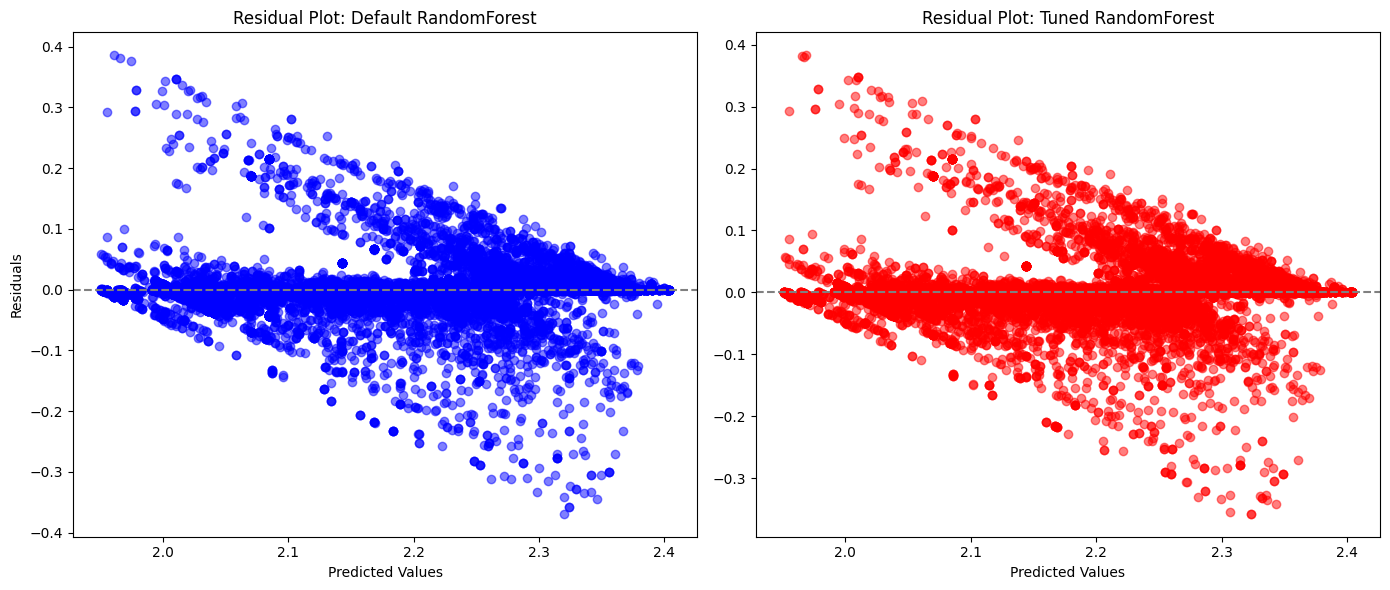

In [127]:
#Random forest Residual Plots 
residuals_default = y_test - default_rf_y_pred

# Tuned Model Predictions
residuals_tuned = y_test - y_pred_rf

# Plotting
plt.figure(figsize=(14, 6))

# Plot for the Default Model
plt.subplot(1, 2, 1)
plt.scatter(default_rf_y_pred, residuals_default, color='blue', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Default RandomForest')

# Plot for the Tuned Model
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, residuals_tuned, color='red', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.title('Residual Plot: Tuned RandomForest')

plt.tight_layout()
plt.show()

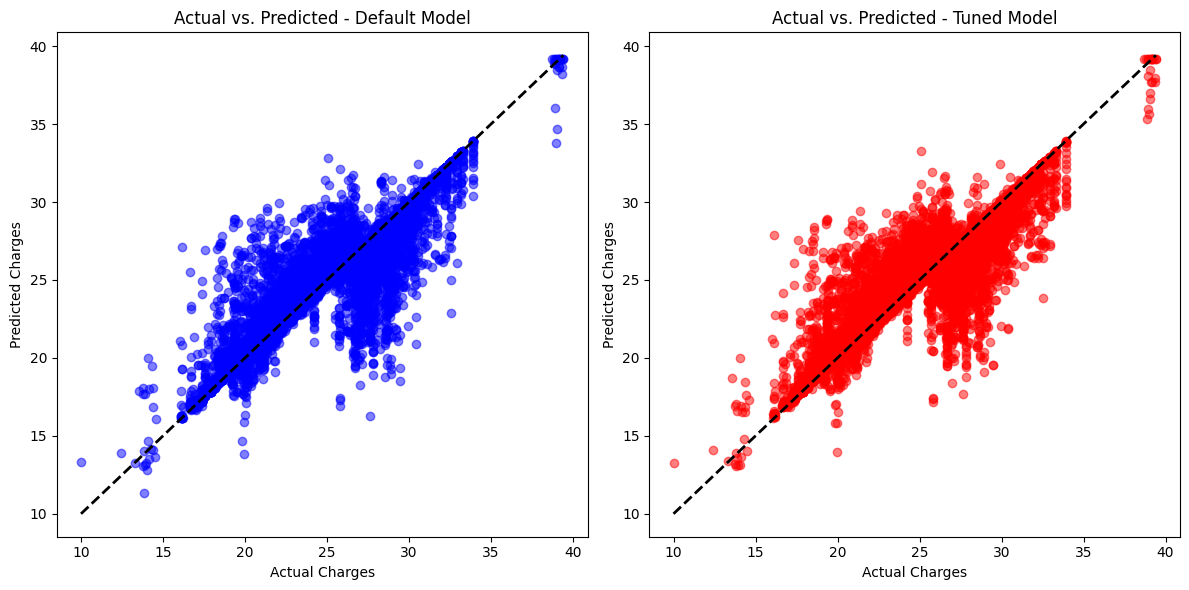

In [97]:
# Actual vs Predicted values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, default_rf_y_pred, alpha=0.5, color='blue', label='Default')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - Default Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='red', label='Tuned')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted - Tuned Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

plt.tight_layout()
plt.show()


In [ ]:
#Random Forest : Hyperparameter Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(rf_score)), rf_score)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# Random Forest Paired t-test
from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(default_rf_scores, rf_score)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")

In [169]:
# # Gradient : Deafult 
# loss: 'squared_error' 
# learning_rate: 0.1 (shrinks the contribution of each tree)
# n_estimators: 100 (The number of boosting stages to be run), subsample: 1.0 (The fraction of samples to be used for fitting the individual base learners.)
# criterion: 'friedman_mse' (The function to measure the quality of a split.)
# min_samples_split: 2 (The minimum number of samples required to split an internal node.)
# min_samples_leaf: 1 (The minimum number of samples required to be at a leaf node.)
# min_weight_fraction_leaf: 0.0 (The minimum weighted fraction of the sum total of weights required to be at a leaf node.)
# max_depth: 3 (Maximum depth of the individual regression estimators.)
# min_impurity_decrease: 0.0 (A node will be split if this split induces a decrease of the impurity greater than or equal to this value.)
# random_state: None (Controls the randomness of the bootstrapping of the samples and the sampling of the features.)
# max_features: None (The number of features to consider when looking for the best split.)
# alpha: 0.9 (The alpha-quantile of the Huber loss function and the quantile loss function, relevant if loss='huber' or loss='quantile'.)
# verbose: 0 (Enable verbose output for logs)
# max_leaf_nodes: None (Grow trees with max_leaf_nodes in a best-first fashion. If None, then an unlimited number of leaf nodes.)
# warm_start: False (When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble; otherwise, just fit a whole new ensemble.)
# validation_fraction: 0.1 (The proportion of training data to set aside as a validation set for early stopping.)
# n_iter_no_change: None (Used to decide if early stopping will be used to terminate training when validation score is not improving.)
# tol: 1e-4 (Tolerance for the early stopping.)

# Gradient : Deafult  & Metrics

Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train, y_train)

default_gb_y_pred = Gradient_model.predict(X_test)

MAE_gradient= mean_absolute_error(y_test, default_gb_y_pred)
MSE_gradient = mean_squared_error(y_test, default_gb_y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
score_gradient = r2_score(y_test, default_gb_y_pred)
default_result.append(score_gradient)

print("Metrics of Gradient booster Model: ")
df_GBM = pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient, score_gradient], index=['MAE', 'MSE', 'RMSE','score_gradient'], columns=['Metrics'])
display(df_GBM)

default_gb_scores = cross_val_score(Gradient_model, X_train, y_train, cv=5)
print("Gradient Cross val score :", default_gb_scores)

df_GBM = pd.DataFrame({'Actual': y_test, 'Predicted':default_gb_y_pred})
display(df_GBM.head())



Metrics of Gradient booster Model: 


,Metrics
MAE,0.34
MSE,0.28
RMSE,0.53
score_gradient,0.66


Gradient Cross val score : [0.67440351 0.66389779 0.670564   0.67831185 0.67536092]


,Actual,Predicted
5219,9.18,9.30
78998,7.46,7.44
65103,9.75,9.31
97160,9.69,9.66
92164,9.69,9.46


In [63]:
#GBR feature importance
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train, y_train)
importances = Gradient_model.feature_importances_
print("Important feature:",importances)

Important feature: [0.48928781 0.04891972 0.04581988 0.00389329 0.40582447 0.00327945
 0.00052646 0.00097422 0.00147471]


In [ ]:
# Gradient : DEFAULT ctual vs. Predicted Values
plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, default_gb_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()

In [ ]:
# Gradient booster regressor : Range of values 
parameter_GBM = {
    'learning_rate': [0.1, 0.2, 0.3 ],  # Smaller values make the optimization process more conservative, reducing overfitting but requiring more trees (n_estimators).
    'n_estimators': [100, 200, 300],  # The number of boosting stages to be run. More stages increase the model's potential complexity.
    'max_depth': [3, 4, 5],  # The maximum depth limits the number of nodes in the tree. Deeper trees can model more complex relationships but might overfit.
    'min_samples_split': [2, 4, 6],  # The minimum number of samples required to split an internal node. Higher values prevent learning overly specific patterns.
    'min_samples_leaf': [1, 2, 4],  # The minimum number of samples required to be at a leaf node. Similar to min_samples_split, it helps to control overfitting.
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split. Choices include 'auto', 'sqrt', 'log2', or None (use all features).
    'loss': ['squared_error', 'absolute_error', 'huber'],   # The loss function to be optimized. 'squared_error' is a good default; 'huber' combines squared error and absolute error for robustness to outliers.
    'random_state' : [42] 
}
# with cv = 2 and cv = 3 
# Best Parameters: {'learning_rate': 0.3, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
# Best Score: 0.8313361153213654
# with cv = 5 
# Best Parameters: {'learning_rate': 0.3, 'loss': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300, 'random_state': 42}
# Best Score: 0.8346936625434495
# with learning rate learning_rate = np.linspace(0.01, 1.0, 10)
# Best Parameters: {'learning_rate': 0.67, 'loss': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
# Best Score: 0.8589827173456739
# Fitting 5 folds for each of 1 candidates, totalling 5 fits
# Best Parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400, 'random_state': 42}
# Best Score: 0.8460378215957862
# Best Parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'random_state': 42}
# Best Score: 0.8767391633284547

# Best Parameters: {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}
# Best Score: 0.8767391633284547

In [151]:
# Gradient : Hyperparemeter tuning after choosing the best parameter 

parameter_GBM = {
    'learning_rate' : 0.1, 
    'n_estimators' : 1000, 
    'max_depth' : 20,
    'min_samples_split': 3,
    'min_samples_leaf': 1, 
    'loss': 'squared_error',  
    'random_state' : 42 
}

Gradient_model = GradientBoostingRegressor(**parameter_GBM)
Gradient_model.fit(X_train, y_train)
y_pred_gbm = Gradient_model.predict(X_test)
# Gradient_model = GridSearchCV(Gradient_model, parameter_GBM, cv=5, n_jobs=-1, verbose=1, scoring='r2')
# Gradient_model.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", Gradient_model.best_params_)
# print("Best Score:", Gradient_model.best_score_)

# # Use the best estimator for further predictions
# best_gbm = Gradient_model.best_estimator_



In [170]:
# Gradient : Hyperparemeter metrics 
# y_pred_gbm = best_gbm.predict(X_test)
MAE_gradient= mean_absolute_error(y_test, y_pred_gbm)
MSE_gradient = mean_squared_error(y_test, y_pred_gbm)
RMSE_gradient =np.sqrt(MSE_gradient)
score_gradient = r2_score(y_test, y_pred_gbm)
print("Gradient Cross val score :",score_gradient)
result.append(score_gradient)

print("Metrics of Gradient booster Model: ")

df_GBM = pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient, score_gradient], index=['MAE', 'MSE', 'RMSE','score_gradient'], columns=['Metrics'])
display(df_GBM)

df_GBM = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_gbm})
display(df_GBM.head())

# parameter_GBM = {
#     'learning_rate' : 0.1, 
#     'n_estimators' : 1000, 
#     'max_depth' : 10,
#     'min_samples_split': 3,
#     'min_samples_leaf': 1, 
#     'loss': 'squared_error',  
#     'random_state' : 42 
# }
# Gradient Cross val score : 0.8587404595343817
# Metrics of Gradient booster Model: 
# Metrics
# MAE	0.17
# MSE	0.12
# RMSE	0.34
# score_gradient	0.86

#2.
# parameter_GBM = {
#     'learning_rate' : 0.1, 
#     'n_estimators' : 1000, 
#     'max_depth' : 20,
#     'min_samples_split': 3,
#     'min_samples_leaf': 1, 
#     'loss': 'squared_error',  
#     'random_state' : 42 
# }
# same for 500 and 20 
# same for 1000 and 30 
# Gradient Cross val score : 0.8028287431566629
# Metrics of Gradient booster Model: 
# Gradient Cross val score : [0.80779777 0.79199878 0.82300594 0.81307655 0.80487749]
# Metrics
# MAE	0.11
# MSE	0.16
# RMSE	0.41
# score_gradient	0.80

Gradient Cross val score : -56.8957368152107
Metrics of Gradient booster Model: 


,Metrics
MAE,6.90
MSE,48.25
RMSE,6.95
score_gradient,-56.90


,Actual,Predicted
5219,9.18,2.22
78998,7.46,2.01
65103,9.75,2.27
97160,9.69,2.27
92164,9.69,2.27


In [131]:

gb_scores = cross_val_score(Gradient_model, X_train, y_train, cv=5)
print("Gradient Cross val score :", gb_scores)

Gradient Cross val score : [0.88154451 0.87211049 0.87569173 0.86486231 0.87516638]


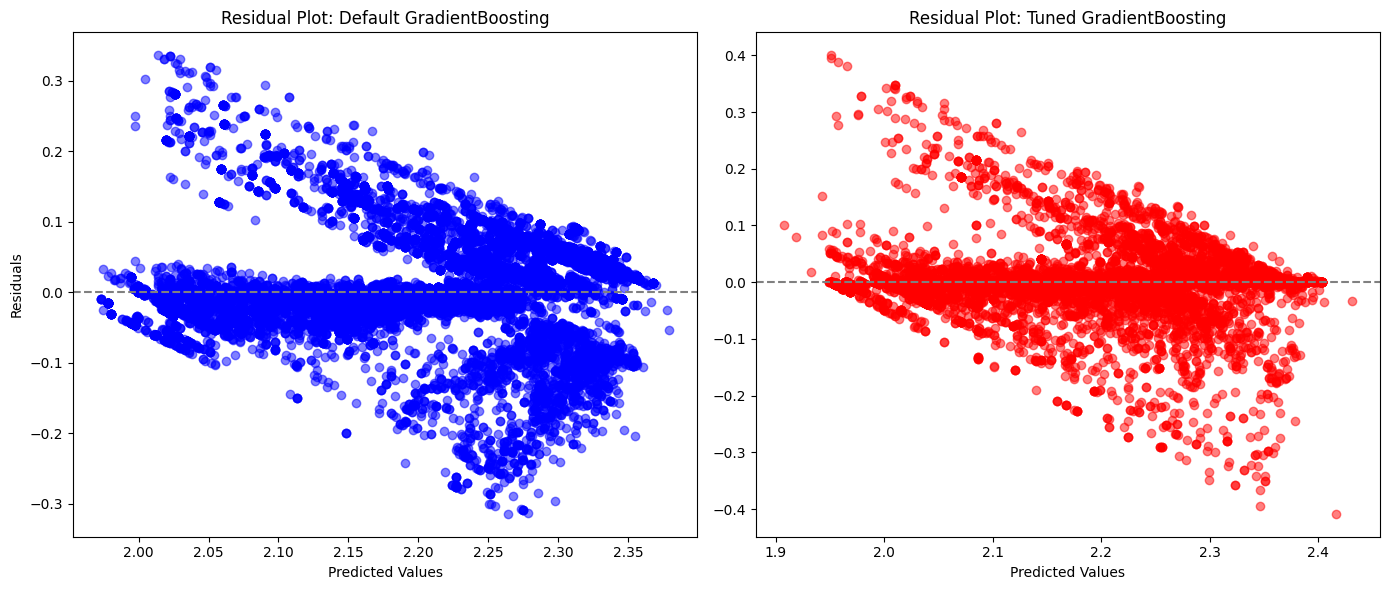

In [132]:
#Gradient forest Residual Plots 
residuals_default = y_test - default_gb_y_pred

# Tuned Model Predictions
residuals_tuned = y_test - y_pred_gbm

# Plotting
plt.figure(figsize=(14, 6))

# Plot for the Default Model
plt.subplot(1, 2, 1)
plt.scatter(default_gb_y_pred, residuals_default, color='blue', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Default GradientBoosting')

# Plot for the Tuned Model
plt.subplot(1, 2, 2)
plt.scatter(y_pred_gbm, residuals_tuned, color='red', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.title('Residual Plot: Tuned GradientBoosting')

plt.tight_layout()
plt.show()

In [ ]:
#Gradient : Hyperparemter Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_gbm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(gb_scores)), gb_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# Linear Paired t-test
from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(default_gb_scores, gb_scores)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")


In [ ]:
# Gradient : Define the bootstrap testing function
from sklearn.utils import resample


def bootstrap_testing(X_train, y_train, X_test, y_test, model, n_iterations=1000, random_state=101):
    r2_scores = []
    for i in range(n_iterations):
        # Bootstrap sample, with the same random state for reproducibility
        X_sample, y_sample = resample(X_train, y_train, random_state=random_state+i)
        # Fit the model on the bootstrap sample
        model.fit(X_sample, y_sample)
        # Predict on the fixed test set
        y_pred = model.predict(X_test)
        # Calculate the R^2 score and append to the list of scores
        r2_scores.append(r2_score(y_test, y_pred))
    # Calculate the confidence interval from the R^2 scores
    confidence_interval = np.percentile(r2_scores, [2.5, 97.5])  # 95% confidence interval
    return confidence_interval

# Use the best estimator from your grid search for bootstrap testing
best_gbm = Gradient_model.best_estimator_

# Run bootstrap testing
# Note: You may want to reduce the number of iterations if computation time is too long
r2_confidence_interval = bootstrap_testing(X_train, y_train, X_test, y_test, best_gbm, n_iterations=50)
print("95% confidence interval for the R^2 score:", r2_confidence_interval)


In [ ]:
# Histogram will provide a visual representation of the variation in R² scores across the bootstrap samples, complementing the numerical confidence interval data.
import matplotlib.pyplot as plt

# Assuming 'r2_scores' is available after running the bootstrap testing
plt.hist(r2_scores, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of R² Scores Across Bootstrap Samples')
plt.xlabel('R² Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Gradient : SHAP 
import shap 

feature_names = ['age', 'sex','bmi', 'region', 'smoker', 'children']

X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Create the SHAP Explainer
explainer = shap.TreeExplainer(best_gbm)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP values for the first 10 predictions
shap.initjs()  # Initialize JavaScript in your Jupyter notebook if using one

shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :], feature_names=feature_names)

In [ ]:
# Plotting a residuals : 
residuals_gb = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals_gb)
plt.axhline(y=0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values for Gradient Boosting Model')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [171]:
# XGB : Default 
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train);
default_xgb_y_pred = XGB_model.predict(X_test)


MAE_XGB = mean_absolute_error(y_test, default_xgb_y_pred)
MSE_XGB = mean_squared_error(y_test, default_xgb_y_pred)
RMSE_XGB = np.sqrt(MSE_XGB)
score_XGB = r2_score(y_test, default_xgb_y_pred)
default_result.append(score_XGB)

print(" Deafult Metrics of XGB: ")

deafult_xgb_scores = cross_val_score(XGB_model, X_train, y_train, cv=5)
print(" Deafult XGB Cross val score :", deafult_xgb_scores)

df_XGB = pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB, score_XGB],index=['MAE', 'MSE', 'RMSE', 'score_XGB'], columns=['Metrics'])
display(df_XGB)

df_XGB = pd.DataFrame({'Actual': y_test, 'Predicted': default_xgb_y_pred})
display(df_XGB.head())

 Deafult Metrics of XGB: 
 Deafult XGB Cross val score : [0.83431894 0.83296994 0.83727979 0.8369407  0.8240773 ]


,Metrics
MAE,0.21
MSE,0.15
RMSE,0.39
score_XGB,0.82


,Actual,Predicted
5219,9.18,9.17
78998,7.46,7.45
65103,9.75,8.99
97160,9.69,9.59
92164,9.69,9.43


In [ ]:
#XGB : Default Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, default_xgb_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(deafult_xgb_scores)), deafult_xgb_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# XGB Hyperparameter range 
# parameter_XGB = {
#     'learning_rate' : [0.1,0.2,0.3] , 
#     'n_estimators' : [100,200,300], 
#     'max_depth' : [3,4,5],
# }
# {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300}

# parameter_XGB = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [3, 5, 7],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 5, 10]

# }

parameter_XGB = {
    'learning_rate': [0.01, 0.05 ],
    'n_estimators': [100, 500],
    'max_depth': [3, 5 ],
    'min_child_weight': [1, 3 ],
    'gamma': [0, 0.1 ],
    'subsample': [0.7, 0.8 ],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 5]



    

    # 'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    # 'n_estimators': [100, 200, 300, 400, 500],
    # 'max_depth': [6, 7, 8],
    # 'min_child_weight': [1, 3, 4],
    # 'gamma': [0, 0.1, 0.3, 0.6],
    # 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    # 'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    # 'reg_alpha': [0, 0.1],
    # 'reg_lambda': [1, 5]
}
# Fitting 5 folds for each of 512 candidates, totalling 2560 fits
# {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 
# 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.7}
# Best Score: 0.7365915486034268
# Best Estimater ; RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
#                       random_state=42)

# {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 
#  'min_child_weight': 3, 'n_estimators': 1000, 'reg_alpha': 0.1, 'reg_lambda': 5, 'subsample': 0.9}
# Best Score: 0.883287934580024

In [175]:
# XGB : Hyperparameter  
# parameter_XGB = {
#     'learning_rate' : 0.1 , 
#     'n_estimators': 1000,  
#     'max_depth': 20,
#     'min_child_weight': 3,
#     'gamma': 0.1,
#     'subsample': 0.9,
#     'colsample_bytree': 0.9,
#     'reg_alpha': 0.1,
#     'reg_lambda': 1
# }

parameter_XGB = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000,1500],
    'max_depth': [7,20,30],
    'min_child_weight': [3],
    'gamma': [0.1],
    'subsample': [ 0.9],
    'colsample_bytree':  [0.9],
    'reg_alpha': [0.1],
    'reg_lambda': [1]

}


# XGB_model = XGBRegressor(**parameter_XGB)
# XGB_model.fit(X_train, y_train)
# xgb_y_pred = XGB_model.predict(X_test)


XGB_model = XGBRegressor()
XGB_model = GridSearchCV(XGB_model, parameter_XGB, cv=5, n_jobs=-1, verbose=1, scoring='r2')
XGB_model.fit(X_train, y_train)

# Print the best parameters found
print(XGB_model.best_params_)
print("Best Score:", XGB_model.best_score_)
# Use the best estimator for further predictions
print("Best Estimater ;",  XGB_model.best_estimator_)

# Use the best estimator for further predictions
best_XGB = XGB_model.best_estimator_



Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 20, 'min_child_weight': 3, 'n_estimators': 1500, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.9}
Best Score: 0.8779875062290717
Best Estimater ; XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=No

In [176]:
# XGB : Hyperparameter  Metrics

xgb_y_pred = best_XGB.predict(X_test)
MAE_XGB = mean_absolute_error(y_test, xgb_y_pred)
MSE_XGB = mean_squared_error(y_test, xgb_y_pred)
RMSE_XGB = np.sqrt(MSE_XGB)
score_XGB = r2_score(y_test, xgb_y_pred)
result.append(score_XGB)

print("Metrics of XGB: ")

df_XGB = pd.DataFrame([MAE_XGB, MSE_XGB, RMSE_XGB, score_XGB], index=['MAE', 'MSE', 'RMSE', 'score_XGB'], columns=['Metrics'])
display(df_XGB)

df_XGB = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_y_pred})
display(df_XGB.head())

# 1st 
# parameter_XGB = {
#     'learning_rate' : 0.1 , 
#     'n_estimators': 1000,
#     'max_depth': 20,
#     'min_child_weight': 3,
#     'gamma': 0.1,
#     'subsample': 0.9,
#     'colsample_bytree': 0.9,
#     'reg_alpha': 0.1,
#     'reg_lambda': 1
# }
#  XGBCross val score : [0.88638764 0.88280101 0.89285294 0.88972606 0.87713016]
# Metrics of XGB: 
# Metrics
# MAE	0.14
# MSE	0.10
# RMSE	0.32
# score_XGB	0.88

Metrics of XGB: 


,Metrics
MAE,0.15
MSE,0.11
RMSE,0.33
score_XGB,0.87


,Actual,Predicted
5219,9.18,9.17
78998,7.46,7.41
65103,9.75,8.98
97160,9.69,9.61
92164,9.69,9.66


/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [12:22:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.83751	valid-rmse:0.83712
[1]	train-rmse:0.76509	valid-rmse:0.76962
[2]	train-rmse:0.70105	valid-rmse:0.71063
[3]	train-rmse:0.64304	valid-rmse:0.65782
[4]	train-rmse:0.59276	valid-rmse:0.61304
[5]	train-rmse:0.54774	valid-rmse:0.57371
[6]	train-rmse:0.50606	valid-rmse:0.53765
[7]	train-rmse:0.46838	valid-rmse:0.50557
[8]	train-rmse:0.43440	valid-rmse:0.47733
[9]	train-rmse:0.41028	valid-rmse:0.45664
[10]	train-rmse:0.38315	valid-rmse:0.43532
[11]	train-rmse:0.35912	valid-rmse:0.41688
[12]	train-rmse:0.34321	valid-rmse:0.40418
[13]	train-rmse:0.33191	valid-rmse:0.39668
[14]	train-rmse:0.31398	valid-rmse:0.38406
[15]	train-rmse:0.29806	valid-rmse:0.37344
[16]	train-rmse:0.28411	valid-rmse:0.36449
[17]	train-rmse:0.27184	valid-rmse:0.35698
[18]	train-rmse:0.26127	valid-rmse:0.35099
[19]	train-rmse:0.25186	valid-rmse:0.34578
[20]	train-rmse:0.24383	valid-rmse:0.34160
[21]	train-rmse:0.24052	valid-rmse:0.34000
[22]	train-rmse:0.23384	valid-rmse:0.33675
[23]	train-rmse:0.227

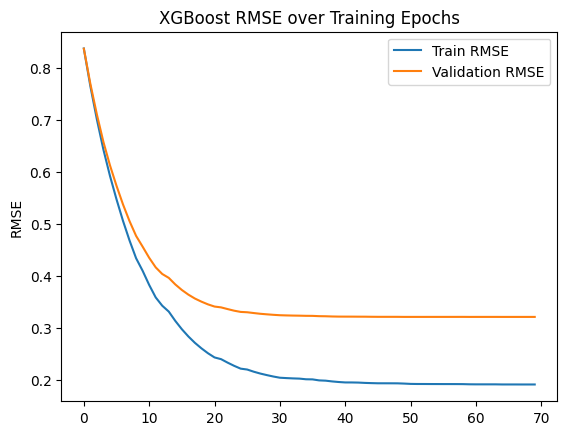

In [70]:
import xgboost as xgb

# Create DMatrix for train and test
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    'learning_rate': 0.1, 
    'n_estimators': 1500,
    'max_depth': 20,
    'min_child_weight': 3,
    'gamma': 0.1,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'objective': 'reg:squarederror'
}

# Specify number of boosting rounds
num_boost_round = 1500

# Dictionary to store evaluation results
evals_result = {}

# Train the model
model = xgb.train(params, dtrain, num_boost_round, 
                  evals=[(dtrain, 'train'), (dvalid, 'valid')],
                  early_stopping_rounds=10, 
                  evals_result=evals_result, 
                  verbose_eval=True)

# Retrieve performance metrics
epochs = len(evals_result['train']['rmse'])
x_axis = range(0, epochs)

# Plotting the learning curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['rmse'], label='Train RMSE')
ax.plot(x_axis, evals_result['valid']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE over Training Epochs')
plt.show()


In [ ]:
xgb_score = cross_val_score(XGB_model, X_train, y_train, cv=5)
print(" XGBCross val score :",xgb_score)

In [ ]:
#XGB : Hyperparameter Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, xgb_y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(xgb_score)), xgb_score)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# Linear Paired t-test
from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(deafult_xgb_scores, xgb_score)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")


In [ ]:
xgb_model = XGBRegressor(colsample_bytree=0.9, gamma=0.1, learning_rate=0.1,
                         max_depth=7, min_child_weight=3, n_estimators=1000,
                         reg_alpha=0.1, reg_lambda=1, subsample=0.9, random_state=42)
xgb_model.fit(X_train, y_train)

In [ ]:
# XGB :Booster test 
from sklearn.utils import resample

def bootstrap_testing(X, y, xgb_model, n_iterations=1000, X_test=None, y_test=None):
    scores = []
    for i in range(n_iterations):
        # Bootstrap sample
        X_sample, y_sample = resample(X, y)
        xgb_model.fit(X_sample, y_sample)
        # Ensure X_test and y_test are provided
        if X_test is not None and y_test is not None:
            y_pred = xgb_model.predict(X_test)
            scores.append(r2_score(y_test, y_pred))
        else:
            raise ValueError("X_test and y_test must be provided")
    return np.percentile(scores, [2.5, 97.5])  # 95% confidence interval

# Example usage:
# Assume 'X_train', 'X_test', 'y_train', and 'y_test' are your features and target variables for training and testing
xgb_model = ... # Your XGBoost model
conf_interval = bootstrap_testing(X_train, y_train, xgb_model, n_iterations=1000, X_test=X_test, y_test=y_test)
print("95% confidence interval for the R2 score:", conf_interval)


In [ ]:
# XGB :SHAP  test 
# import shap 

feature_names = ['age', 'sex',' bmi', 'region,', 'smoker', 'children']

X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Create the SHAP Explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP values for the first 10 predictions
shap.initjs()  # Initialize JavaScript in your Jupyter notebook if using one

shap.force_plot(explainer.expected_value, shap_values[0, :], X_train_df.iloc[0, :], feature_names=feature_names)


In [136]:
# MLP : Deafult  Metrics

MLP_model = MLPRegressor()
MLP_model.fit(X_train,y_train)
deafult_mlp_y_predict = MLP_model.predict(X_test)
MAE_MLP_reg= mean_absolute_error(y_test, deafult_mlp_y_predict)
MSE_MLP_reg = mean_squared_error(y_test, deafult_mlp_y_predict)
RMSE_MLP_reg =np.sqrt(MSE_MLP_reg)
score_MLP = r2_score(y_test,deafult_mlp_y_predict)
default_result.append(score_MLP)

print(" Default Metrics of MLP Regression")

df_MLP = pd.DataFrame([MAE_MLP_reg, MSE_MLP_reg, RMSE_MLP_reg, score_MLP], index=['MAE_MLP_reg', 'MSE_MLP_reg', 'RMSE_MLP_reg', 'R2_score_MLP'], columns=['Metrics'])
display(df_MLP)

df_MLP = pd.DataFrame({'Actual': y_test, 'Predicted': deafult_mlp_y_predict})
display(df_MLP.head())

 Default Metrics of MLP Regression


,Metrics
MAE_MLP_reg,0.04
MSE_MLP_reg,0.00
RMSE_MLP_reg,0.06
R2_score_MLP,0.65


,Actual,Predicted
5219,2.22,2.26
78998,2.01,1.98
65103,2.28,2.23
97160,2.27,2.31
92164,2.27,2.21


In [137]:
deafult_mlp_scores = cross_val_score(MLP_model, X_train, y_train, cv=5)
print("Default MLP Cross val score :", deafult_mlp_scores)


Default MLP Cross val score : [0.6813431  0.67658176 0.68045383 0.66247775 0.67368424]


In [ ]:
# MLP : Deafult Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, deafult_mlp_y_predict, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(deafult_mlp_scores)), deafult_mlp_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# MLP HYper parameter range 
# Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
# Best score:  0.6260614348097947
# Best Estimater ; MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500)
# Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
# Best score:  0.6260614348097947
# Best Estimater ; MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500)


In [138]:
# MLP : Hyperparameter 
parameter_mlp = {
    'hidden_layer_sizes': (100,100),  # Number of neurons in the hidden layers
    'activation': 'relu',                             # Activation function for the hidden layer
    'solver': 'adam',                                 # The solver for weight optimization
    'alpha': 0.01,                             # L2 penalty (regularization term) parameter
    'max_iter': 1500                               # Maximum number of iterations
}

MLP_model = MLPRegressor(**parameter_mlp)
MLP_model.fit(X_train,y_train)

# grid_search_mlp = GridSearchCV(MLP_model, parameter_mlp, n_jobs=-1, cv=5)
# grid_search_mlp.fit(X_train,y_train)

# print("Best parameters found: ", grid_search_mlp.best_params_)
# print("Best score: ", grid_search_mlp.best_score_)


# best_mlp = grid_search_mlp.best_estimator_


#Tryoed with 1000, 1500 
# Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 1500, 'solver': 'adam'}
# Best score:  0.7126034356135637

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1500)

In [139]:
# MLP : Hyperparameter 
y_pred_mlp = MLP_model.predict(X_test)
MAE_MLP_reg= mean_absolute_error(y_test, y_pred_mlp)
MSE_MLP_reg = mean_squared_error(y_test, y_pred_mlp)
RMSE_MLP_reg =np.sqrt(MSE_MLP_reg)
score_MLP = r2_score(y_test,y_pred_mlp)
result.append(score_MLP)

print("Metrics of MLP Regression")

df_MLP = pd.DataFrame([MAE_MLP_reg, MSE_MLP_reg, RMSE_MLP_reg, score_MLP], index=['MAE_MLP_reg', 'MSE_MLP_reg', 'RMSE_MLP_reg', 'R2_score_MLP'], columns=['Metrics'])
display(df_MLP)

df_MLP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_mlp})
display(df_MLP.head())



Metrics of MLP Regression


,Metrics
MAE_MLP_reg,0.03
MSE_MLP_reg,0.00
RMSE_MLP_reg,0.06
R2_score_MLP,0.68


,Actual,Predicted
5219,2.22,2.21
78998,2.01,1.99
65103,2.28,2.24
97160,2.27,2.29
92164,2.27,2.24


In [140]:

mlp_score = cross_val_score(MLP_model, X_train, y_train, cv=5)
print(" MLP Cross val score :",mlp_score)

 MLP Cross val score : [0.69163831 0.68094695 0.68057729 0.68319915 0.69678744]


In [ ]:
# MLP : Hyperparameter Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_mlp, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(mlp_score)), mlp_score)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# MLP Paired t-test
from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(deafult_mlp_scores, mlp_score)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")


In [ ]:
#  MLP : Monitoring Overfitting (with Early Stopping):

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
predictions = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f"MSE: {mse}")


# Plotting the Loss Curve:

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


# Avoiding Overfitting with Regularization (Example using L2 Regularization):

mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001)  # Alpha is the L2 penalty term
mlp.fit(X_train_scaled, y_train)

# The interpretation of these outputs would focus on whether the loss decreases and plateaus over time, 
# whether the final model has a low error on both the training and test sets, and whether the model is overly complex for the problem at hand.

# No single evaluation metric or plot can give a definitive answer about the MLP's suitability for a given problem. 
# Instead, a combination of different evaluations should be used to judge the model's fit to the data and its predictive performance.


In [ ]:
# MLP : Hyperparameter Visulization 
from sklearn.utils import resample

# Define the bootstrap testing function
def bootstrap_testing(X_train, y_train, X_test, y_test, best_mlp, n_iterations=1000, random_state=101):
    r2_scores = []
    for i in range(n_iterations):
        # Bootstrap sample, with the same random state for reproducibility
        X_sample, y_sample = resample(X_train, y_train, random_state=random_state+i)
        # Fit the model on the bootstrap sample
        best_mlp.fit(X_sample, y_sample)
        # Predict on the fixed test set
        y_pred = best_mlp.predict(X_test)
        # Calculate the R^2 score and append to the list of scores
        r2_scores.append(r2_score(y_test, y_pred))
    # Calculate the confidence interval from the R^2 scores
    confidence_interval = np.percentile(r2_scores, [2.5, 97.5])  # 95% confidence interval
    return confidence_interval

# Use the best estimator from your grid search for bootstrap testing
best_mlp = grid_search_mlp.best_estimator_

# Run bootstrap testing
# Note: You may want to reduce the number of iterations if computation time is too long
r2_confidence_interval = bootstrap_testing(X_train, y_train, X_test, y_test, best_mlp, n_iterations=50)
print("95% confidence interval for the R^2 score:", r2_confidence_interval)


In [141]:
# SVR : Deafult  
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error

# Define the SVM model with default parameters
svr_model = svm.SVR()

# Fit the SVM model to the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
default_y_pred_svm = svr_model.predict(X_test)

# Calculate the R^2, MSE, and RMSE

mae_svm = mean_absolute_error(y_test, default_y_pred_svm)
mse_svm = mean_squared_error(y_test, default_y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
score_svm = r2_score(y_test, default_y_pred_svm)
default_result.append(score_svm)


print(" Default Metrics of SVR Regression")

df_svm = pd.DataFrame([mae_svm, mse_svm, rmse_svm, score_svm], index=['mae_svm', 'mse_svm', 'rmse_svm', 'score_svm'], columns=['Metrics'])
display(df_svm)

df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': default_y_pred_svm})
display(df_svm.head())


 Default Metrics of SVR Regression


,Metrics
mae_svm,0.07
mse_svm,0.01
rmse_svm,0.08
score_svm,0.41


,Actual,Predicted
5219,2.22,2.28
78998,2.01,2.04
65103,2.28,2.21
97160,2.27,2.28
92164,2.27,2.17


In [142]:

default_svr_scores = cross_val_score(svr_model, X_train, y_train, cv=5)
print("Default SVR Cross val score :", default_svr_scores)

Default SVR Cross val score : [0.41186377 0.40957842 0.41406976 0.4163904  0.41763806]


In [ ]:
# SVR : Deafult Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, default_y_pred_svm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(default_svr_scores)), default_svr_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [143]:
# SVR : Hyperparameter 

from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error

# Define the SVM model with default parameters
parameters = {
    'C': 50,   #  'C': [20,30,], 
    'gamma': 'auto',
    'kernel': 'rbf'
}

svm_model = svm.SVR(**parameters)
svm_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# # Fit the SVM model to the training 
# gride_search_svm = GridSearchCV(svm_model, parameters, cv=5, scoring='r2', verbose=1, n_jobs=-1)
# gride_search_svm.fit(X_train, y_train)

# print("Best parameters found: ", gride_search_svm.best_params_)
# print("Best score: ", gride_search_svm.best_score_)

# best_svm = gride_search_svm.best_estimator_


# Make predictions on the test data
# y_pred_svm = best_svm.predict(X_test)
# Calculate the R^2, MSE, and RMSE

mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
score_svm = r2_score(y_test, y_pred_svm)
result.append(score_svm)


print("Metrics of SVR Regression")

df_svm = pd.DataFrame([mae_svm, mse_svm, rmse_svm, score_svm], index=['mae_svm', 'mse_svm', 'rmse_svm', 'score_svm'], columns=['Metrics'])
display(df_svm)

df_svm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})
display(df_svm.head())

# Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
# Best score:  0.6430330161418499
# Best Estimater ; SVR(C=10, gamma='auto')
# Test MSE: 0.29259064858291417
# Test R-squared: 0.656797756125635
# r_sqaure : 0.66
# with 30 and 50 
# Fitting 5 folds for each of 2 candidates, totalling 10 fits
# Best parameters found:  {'C': 50, 'gamma': 'auto', 'kernel': 'rbf'}
# Best score:  0.6503434785235884

Metrics of SVR Regression


,Metrics
mae_svm,0.07
mse_svm,0.01
rmse_svm,0.08
score_svm,0.44


,Actual,Predicted
5219,2.22,2.29
78998,2.01,2.06
65103,2.28,2.18
97160,2.27,2.34
92164,2.27,2.18


In [144]:
svr_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(" SVR Cross val score :", svr_scores)


 SVR Cross val score : [0.45913073 0.44865373 0.44074858 0.44685193 0.4507255 ]


In [ ]:
# SVR : Hyperparameter Visulization 

plt.figure(figsize=(16, 6)) 

# First subplot: Actual vs. Predicted Values
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(y_test, y_pred_svm, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')

# Second subplot: Cross-Validation Scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(range(len(svr_scores)), svr_scores)
plt.xlabel('Fold Number')
plt.ylabel('R^2 Score')
plt.title('Cross-Validation Scores')

# Display the combined plot
plt.tight_layout()  # Automatically adjust subplots to fit into figure area.
plt.show()


In [ ]:
# SVR Paired t-test
from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(default_svr_scores, svr_scores)

print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("The difference in performance is statistically significant.")
else:
    print("There is no statistically significant difference in performance.")


In [ ]:
score = cross_val_score(best_svm, X_train, y_train, cv=5)
print(" SVR Cross val score :",score)

In [ ]:
print("Best parameters found: ", svm_model.best_params_)
print("Best score: ", svm_model.best_score_)
# Use the best estimator for further predictions
print("Best Estimater ;",  svm_model.best_estimator_)
# Evaluate the model
mse =metrics.mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")

# Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
# Best score:  0.6430330161418499
# Best Estimater ; SVR(C=10, gamma='auto')
# Test MSE: 0.29259064858291417
# Test R-squared: 0.656797756125635

In [145]:
print(len(result))
print(len([ "RandomForestRegression","Gradient Boosting Regression", "XGBRegression", "MLPRegression", "SVRRegression"]))
print(len(default_result))
print(len([ "RandomForestRegression","Gradient Boosting Regression", "XGBRegression", "MLPRegression", "SVRRegression"]))

5
5
5
5


In [146]:
df_result = pd.DataFrame({"Score":result, "ML Models":["RandomForestRegression","Gradient Boosting Regression", "XGBRegression", "MLPRegression", "SVRRegression"]})

In [147]:
df_deafult_result = pd.DataFrame({"Score":default_result, "ML Models":["RandomForestRegression","Gradient Boosting Regression", "XGBRegression", "MLPRegression", "SVRRegression"]})

/var/folders/zk/nxygf1ld2tv049pmc58f5dr40000gn/T/ipykernel_3676/2264762287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="Score", y="ML Models", data=df_result, palette=palette)


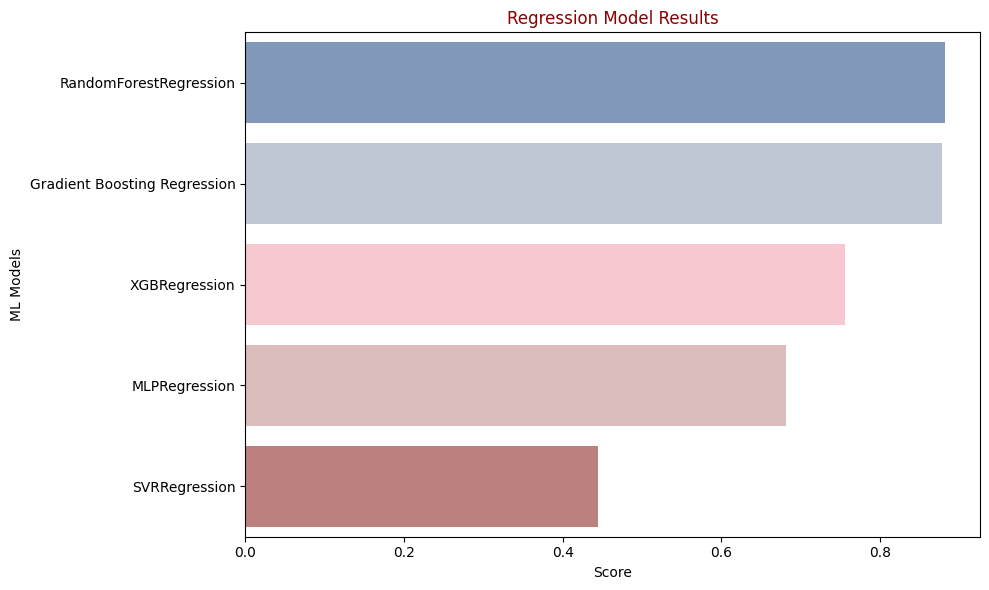

In [148]:

# Optional: Adjust the size of the plot
plt.figure(figsize=(10, 6))

# Generate the 'vlag' palette and convert it to a list
palette = sns.color_palette("vlag", n_colors=len(df_result['ML Models'].unique()))

# Change the third model color to a completely different and more visible color
# Example: Using a bright color like 'deepskyblue' or 'lime'
palette[2] = "pink"  # This color will be significantly different and more visible

# Create a barplot using the modified palette
g = sns.barplot(x="Score", y="ML Models", data=df_result, palette=palette)

# Set the title and labels
g.set_title("Regression Model Results", color="darkred")
g.set_xlabel("Score")
g.set_ylabel("ML Models")

# Show the plot
plt.tight_layout()  # Adjust the layout to make sure labels and title are clear
plt.show()


/var/folders/zk/nxygf1ld2tv049pmc58f5dr40000gn/T/ipykernel_3676/2459669379.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="Score", y="ML Models", data=df_deafult_result, palette=palette)


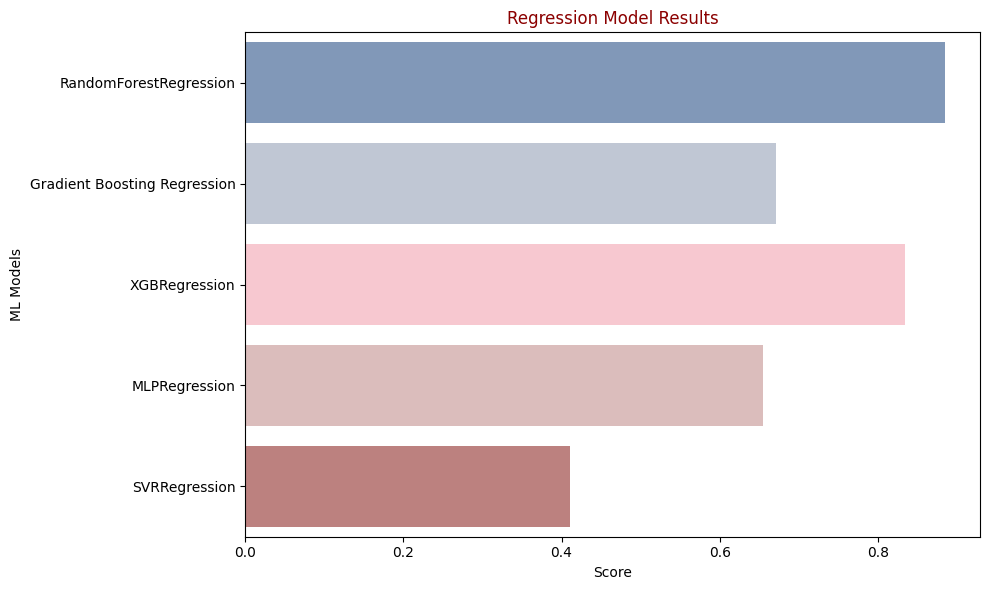

In [149]:

plt.figure(figsize=(10, 6))

# Generate the 'vlag' palette and convert it to a list
palette = sns.color_palette("vlag", n_colors=len(df_deafult_result['ML Models'].unique()))

# Change the third model color to a completely different and more visible color
# Example: Using a bright color like 'deepskyblue' or 'lime'
palette[2] = "pink"  # This color will be significantly different and more visible

# Create a barplot using the modified palette
g = sns.barplot(x="Score", y="ML Models", data=df_deafult_result, palette=palette)

# Set the title and labels
g.set_title("Regression Model Results", color="darkred")
g.set_xlabel("Score")
g.set_ylabel("ML Models")

# Show the plot
plt.tight_layout()  # Adjust the layout to make sure labels and title are clear
plt.show()


/var/folders/zk/nxygf1ld2tv049pmc58f5dr40000gn/T/ipykernel_3676/3975243704.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=data, palette='PuBu')


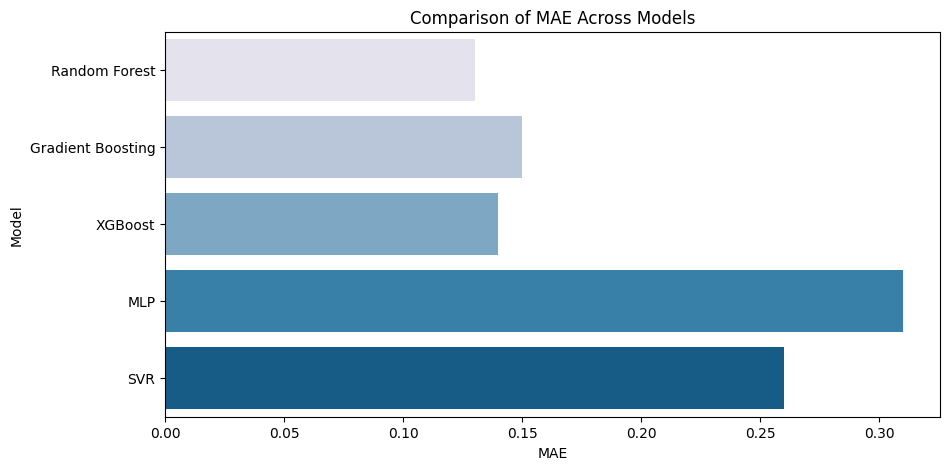

/var/folders/zk/nxygf1ld2tv049pmc58f5dr40000gn/T/ipykernel_3676/3975243704.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=data, palette='PuBu')


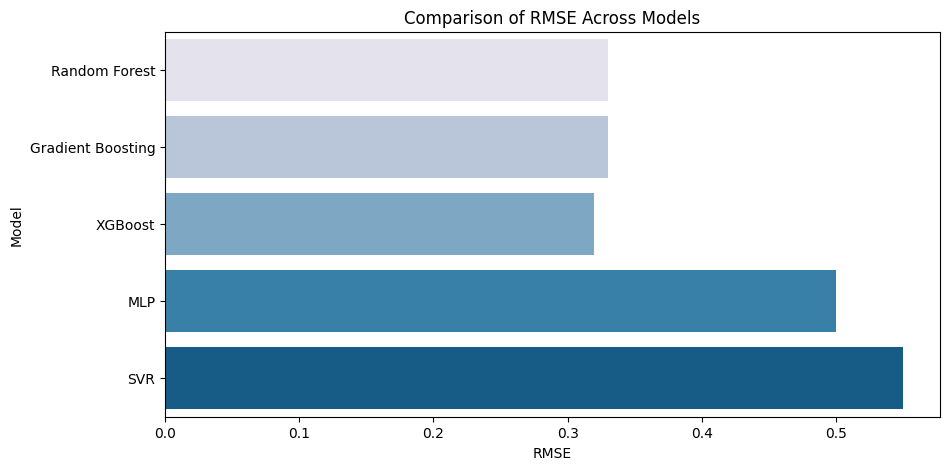

/var/folders/zk/nxygf1ld2tv049pmc58f5dr40000gn/T/ipykernel_3676/3975243704.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=data, palette='YlGnBu')


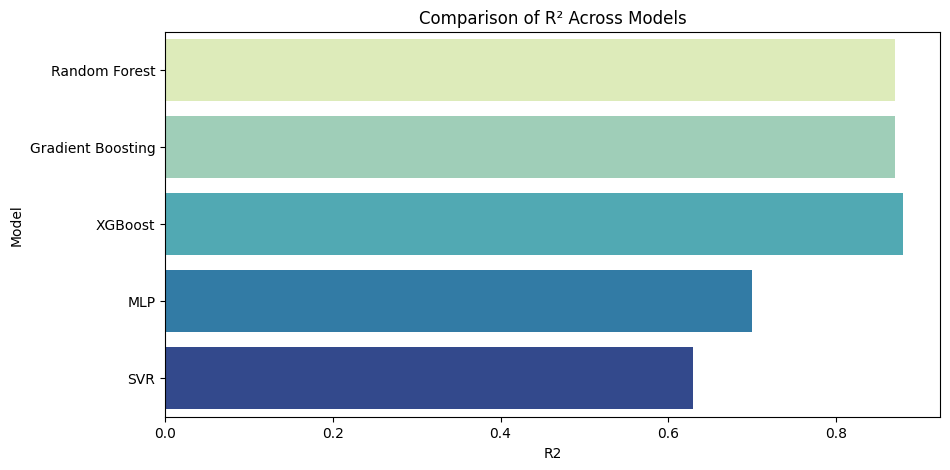

In [150]:
# Data setup
models = ["Random Forest", "Gradient Boosting", "XGBoost", "MLP", "SVR"]
mae = [0.13, 0.15, 0.14, 0.31, 0.26]  # Assuming these are the final MAE values after tuning
rmse = [0.33, 0.33, 0.32, 0.50, 0.55]
r2 = [0.87, 0.87, 0.88, 0.70, 0.63]
data = pd.DataFrame({'Model': models, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

# MAE Bar Graph
plt.figure(figsize=(10, 5))
sns.barplot(x='MAE', y='Model', data=data, palette='PuBu')
plt.title('Comparison of MAE Across Models')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='RMSE', y='Model', data=data, palette='PuBu')
plt.title('Comparison of RMSE Across Models')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=data, palette='YlGnBu')
plt.title('Comparison of R² Across Models')
plt.show()

In [ ]:
print(len(result))
print(len(["LinearRegression", "RandomForestRegression", "XGBRegression", "MLPRegression", "RidgeRegression", "KNN Regression", "Gradient Boosting Regression"]))
df_result = pd.DataFrame({"Score":result, "ML Models":["LinearRegression","RandomForestRegression",
             "XGBRegression","MLPRegression","RidgeRegression","KNN Regression","Gradient Boosting Regression"]})


# Create a barplot
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
g = sns.barplot(x="Score", y="ML Models", data=df_result, palette="vlag")

# Set the title and labels
g.set_title("Regression Model Results", color="darkred")
g.set_xlabel("Score")
g.set_ylabel("ML Models")

# Show the plot
plt.tight_layout()  # Optional: Adjust the layout to fit the labels
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example dataset loaded into DataFrame 'df'
# df = pd.read_csv('your_dataset.csv')  # Uncomment this if you need to load a dataset

# Let's assume 'target' is the name of your target variable
X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
gb_pred = gb.predict(X_test)


# Calculate the Mean Squared Error (MSE) for each model
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)

# Print out the MSE results
print(f"Random Forest MSE: {rf_mse}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"Graient Boosting MSE: {gb_mse}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List to store the number of trees and corresponding MSE
trees = [1, 10, 50, 100, 200, 300, 400, 500]
mse_scores = []

for n in trees:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(trees, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Effect of Increasing Trees on Model Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()
